# World Happiness Data Science Project

# Introduction

~ The World Happiness Report is a landmark survey of the state of global happiness.

~ The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.

~ Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations.

~ The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

~ The World Happiness Report is an important study that examines the state of global happiness and how happiness indicators are used in policymaking.

~The report explains how experts from various fields use happiness and well-being measurements to assess the progress of nations.




# About this Dataset

CONTEXT

The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

CONTENT

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

# Data Content

Here's a brief explanation of each column in the dataset:

1.Country name: Name of the country.

2.Regional indicator: Region to which the country belongs.

3.Ladder score: The happiness score for each country, based on responses to the Cantril Ladder question that asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0.

4.Upper whisker: Upper bound of the happiness score.

5.Lower whisker: Lower bound of the happiness score.

6.Log GDP per capita: The natural logarithm of the country's GDP per capita, adjusted for purchasing power parity (PPP) to account for differences in the cost of living between countries.

7.Social support: The national average of binary responses(either 0 or 1 representing No/Yes) to the question about having relatives or friends to count on in times of trouble.

8.Healthy life expectancy: The average number of years a newborn infant would live in good health, based on mortality rates and life expectancy at different ages.

9.Freedom to make life choices: The national average of responses to the question about satisfaction with freedom to choose what to do with one's life.

10.Generosity: The residual of regressing the national average of responses to the question about donating money to charity on GDP per capita.

11.Perceptions of corruption: The national average of survey responses to questions about the perceived extent of corruption in the government and businesses.

12.Dystopia + residual: Dystopia is an imaginary country with the world’s least-happy people, used as a benchmark for comparison. The dystopia + residual score is a combination of the Dystopia score and the unexplained residual for each country, ensuring that the combined score is always positive. Each of these factors contributes to the overall happiness score, but the Dystopia + residual value is a benchmark that ensures no country has a lower score than the hypothetical Dystopia.

13.Positive affect: The national average of responses to questions about positive emotions experienced yesterday.

14.Negative affect: The national average of responses to questions about negative emotions experienced yesterday.



# Importing all the required Libraries

In this section, we import the libraries used throughout the notebook.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline  


import os
for dirname, _, filenames in os.walk('/Users/mukeshkorri/Downloads/World-Happiness-Report'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

import warnings
warnings.filterwarnings("ignore")

/Users/mukeshkorri/Downloads/World-Happiness-Report/World-happiness-report-2024.csv
/Users/mukeshkorri/Downloads/World-Happiness-Report/world-happiness-report-2021.csv
/Users/mukeshkorri/Downloads/World-Happiness-Report/population_density_long.csv
/Users/mukeshkorri/Downloads/World-Happiness-Report/population_below_age_14_percentage_long.csv
/Users/mukeshkorri/Downloads/World-Happiness-Report/Inconsistance.png
/Users/mukeshkorri/Downloads/World-Happiness-Report/population_total_long.csv
/Users/mukeshkorri/Downloads/World-Happiness-Report/world-happiness-report.csv
/Users/mukeshkorri/Downloads/World-Happiness-Report/World-happiness-report-updated_2024.csv
/Users/mukeshkorri/Downloads/World-Happiness-Report/pop_worldometer_data.csv
/Users/mukeshkorri/Downloads/World-Happiness-Report/population_above_age_65_percentage_long.csv
/Users/mukeshkorri/Downloads/World-Happiness-Report/population_female_percentage_long.csv


# Read and Analyse Data


In [3]:
df = pd.read_csv('/Users/mukeshkorri/Downloads/World-Happiness-Report/World-happiness-report-updated_2024.csv', encoding='ISO-8859-1')


In [4]:
df.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.414            0.258  
1                      0.850            0.481            0.237  
2                      0.707            0.517            0.275  
3                      0.731            0.480            0.267  
4                      0.776            0.614            0.268

In [5]:
df.describe().T

count         mean       std       min  \
year                              2363.0  2014.763860  5.059436  2005.000   
Life Ladder                       2363.0     5.483566  1.125522     1.281   
Log GDP per capita                2335.0     9.399671  1.152069     5.527   
Social support                    2350.0     0.809369  0.121212     0.228   
Healthy life expectancy at birth  2300.0    63.401828  6.842644     6.720   
Freedom to make life choices      2327.0     0.750282  0.139357     0.228   
Generosity                        2282.0     0.000098  0.161388    -0.340   
Perceptions of corruption         2238.0     0.743971  0.184865     0.035   
Positive affect                   2339.0     0.651882  0.106240     0.179   
Negative affect                   2347.0     0.273151  0.087131     0.083   

                                        25%        50%         75%       max  
year                              2011.0000  2015.0000  2019.00000  2023.000  
Life Ladder                          4.6470     5.4490     6.32350     8.019  
Log GDP per capita                   8.5065     9.5030    10.39250    11.676  
Social support                       0.7440     0.8345     0.90400     0.987  
Healthy life expectancy at birth    59.1950    65.1000    68.55250    74.600  
Freedom to make life choices         0.6610     0.7710     0.86200     0.985  
Generosity                          -0.1120    -0.0220     0.09375     0.700  
Perceptions of corruption            0.6870     0.7985     0.86775     0.983  
Positive affect                      0.5720     0.6630     0.73700     0.884  
Negative affect                      0.2090     0.2620     0.32600     0.705

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [7]:
df2024 = pd.read_csv('/Users/mukeshkorri/Downloads/World-Happiness-Report/World-happiness-report-2024.csv')


In [8]:
df2024.head()


Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277               1.803           1.513                    0.740   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.859       0.142                      0.546   
1                         0.823       0.204                      0.548   
2                         0.819       0.258                      0.182   
3                         0.838       0.221                      0.524   
4                         0.641       0.153                      0.193   

   Dystopia + residual  
0                2.082  
1                1.881  
2                2.050  
3                1.658  
4                2.298

In [9]:
df2024.describe().T


count      mean       std    min      25%  \
Ladder score                  143.0  5.527580  1.170717  1.721  4.72600   
upperwhisker                  143.0  5.641175  1.155008  1.775  4.84550   
lowerwhisker                  143.0  5.413972  1.187133  1.667  4.60600   
Log GDP per capita            140.0  1.378807  0.425098  0.000  1.07775   
Social support                140.0  1.134329  0.333317  0.000  0.92175   
Healthy life expectancy       140.0  0.520886  0.164923  0.000  0.39800   
Freedom to make life choices  140.0  0.620621  0.162492  0.000  0.52750   
Generosity                    140.0  0.146271  0.073441  0.000  0.09100   
Perceptions of corruption     140.0  0.154121  0.126238  0.000  0.06875   
Dystopia + residual           140.0  1.575914  0.537459 -0.073  1.30825   

                                 50%      75%    max  
Ladder score                  5.7850  6.41600  7.741  
upperwhisker                  5.8950  6.50750  7.815  
lowerwhisker                  5.6740  6.31900  7.667  
Log GDP per capita            1.4315  1.74150  2.141  
Social support                1.2375  1.38325  1.617  
Healthy life expectancy       0.5495  0.64850  0.857  
Freedom to make life choices  0.6410  0.73600  0.863  
Generosity                    0.1365  0.19250  0.401  
Perceptions of corruption     0.1205  0.19375  0.575  
Dystopia + residual           1.6445  1.88175  2.998

In [10]:
df2024.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [11]:
df2024.rename(columns={
    "Overall rank": "rank",
    "Country name": "country",
    "Ladder score": "score",
    "Log GDP per capita": "gdp",
    "Social support": "social",
    "Healthy life expectancy": "healthy",
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "corruption"
},inplace=True)
df2024 = df2024.drop(['upperwhisker', 'lowerwhisker','Regional indicator'], axis=1)

# Missing Value Treatment


In [12]:
df2024.columns[df2024.isnull().any()]


Index(['gdp', 'social', 'healthy', 'freedom', 'generosity', 'corruption',
       'Dystopia + residual'],
      dtype='object')

In [13]:
df2024.isnull().sum()


country                0
score                  0
gdp                    3
social                 3
healthy                3
freedom                3
generosity             3
corruption             3
Dystopia + residual    3
dtype: int64

In [14]:
df2024[df2024["corruption"].isnull()]


country  score  gdp  social  healthy  freedom  generosity  \
61              Bahrain  5.959  NaN     NaN      NaN      NaN         NaN   
87           Tajikistan  5.281  NaN     NaN      NaN      NaN         NaN   
102  State of Palestine  4.879  NaN     NaN      NaN      NaN         NaN   

     corruption  Dystopia + residual  
61          NaN                  NaN  
87          NaN                  NaN  
102         NaN                  NaN

Since these 3 countries have a lot of missing values, we will drop them



In [15]:
df2024 = df2024.dropna(subset=['corruption'])

# Verify that there are no more missing values in the 'corruption' column
df2024[df2024["corruption"].isnull()]

Empty DataFrame
Columns: [country, score, gdp, social, healthy, freedom, generosity, corruption, Dystopia + residual]
Index: []

# Overview
This project aims to predict happiness scores using machine learning techniques. By analyzing various socio-economic factors such as GDP per capita, social support, and freedom to make life choices, we aim to develop a model that can forecast happiness levels globally, contributing to a deeper understanding of well-being dynamics and potential interventions.

# Expanatory Data Analysis

In [16]:
df = pd.read_csv('/Users/mukeshkorri/Downloads/World-Happiness-Report/World-happiness-report-updated_2024.csv', encoding='ISO-8859-1')


In [17]:
df.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.414            0.258  
1                      0.850            0.481            0.237  
2                      0.707            0.517            0.275  
3                      0.731            0.480            0.267  
4                      0.776            0.614            0.268

In [18]:
# This code corrects the country names listed as 'Turkiye' in the dataset to 'Turkey,' 
# ensuring that the country is properly matched on the Plotly map.
df['Country name'] = df['Country name'].replace('Türkiye', 'Turkey')


In [19]:
df2024 = pd.read_csv('/Users/mukeshkorri/Downloads/World-Happiness-Report/World-happiness-report-2024.csv')


In [20]:
df2024.head()


Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277               1.803           1.513                    0.740   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.859       0.142                      0.546   
1                         0.823       0.204                      0.548   
2                         0.819       0.258                      0.182   
3                         0.838       0.221                      0.524   
4                         0.641       0.153                      0.193   

   Dystopia + residual  
0                2.082  
1                1.881  
2                2.050  
3                1.658  
4                2.298

# Data Distributions in 2024

: Unique Countries 

: Count Regional Indicator

: Distribution of Remaining Features

In [21]:
# unique countries

df2024['Country name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
       'Norway', 'Luxembourg', 'Switzerland', 'Australia', 'New Zealand',
       'Costa Rica', 'Kuwait', 'Austria', 'Canada', 'Belgium', 'Ireland',
       'Czechia', 'Lithuania', 'United Kingdom', 'Slovenia',
       'United Arab Emirates', 'United States', 'Germany', 'Mexico',
       'Uruguay', 'France', 'Saudi Arabia', 'Kosovo', 'Singapore',
       'Taiwan Province of China', 'Romania', 'El Salvador', 'Estonia',
       'Poland', 'Spain', 'Serbia', 'Chile', 'Panama', 'Malta', 'Italy',
       'Guatemala', 'Nicaragua', 'Brazil', 'Slovakia', 'Latvia',
       'Uzbekistan', 'Argentina', 'Kazakhstan', 'Cyprus', 'Japan',
       'South Korea', 'Philippines', 'Vietnam', 'Portugal', 'Hungary',
       'Paraguay', 'Thailand', 'Malaysia', 'China', 'Honduras', 'Bahrain',
       'Croatia', 'Greece', 'Bosnia and Herzegovina', 'Libya', 'Jamaica',
       'Peru', 'Dominican Republic', 'Mauritius', 'Moldova', 'Russia',
       'Boli

In [22]:
df2024["Regional indicator"].unique()


array(['Western Europe', 'Middle East and North Africa',
       'North America and ANZ', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'Southeast Asia', 'East Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

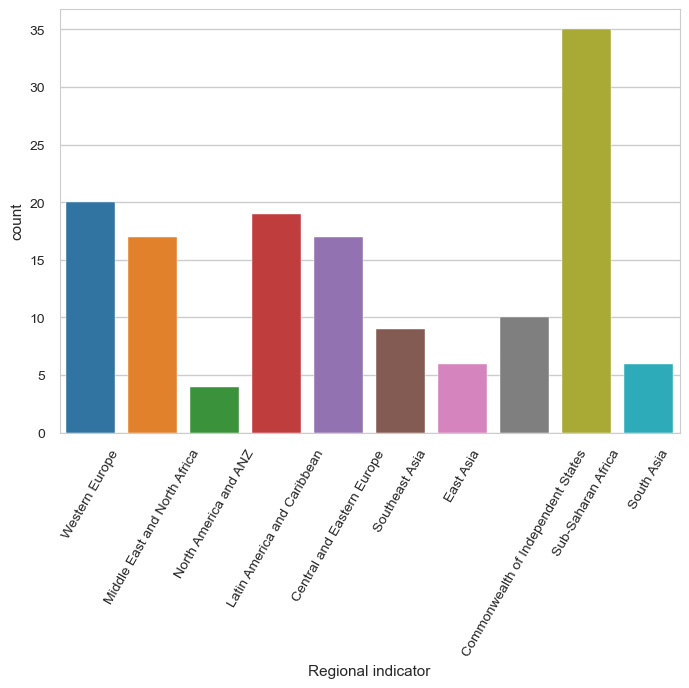

In [23]:
# count regional indicator

sns.countplot(x="Regional indicator", data=df2024)
plt.xticks(rotation=60)
plt.show()

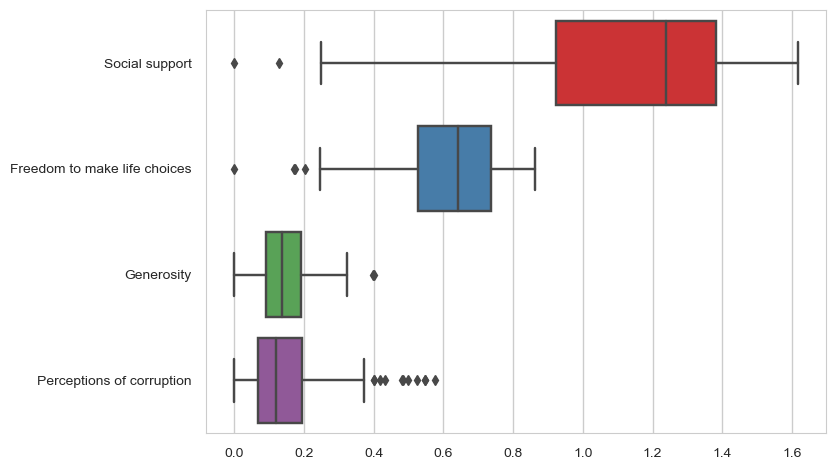

In [24]:
# Distribution of feature set1
list_features = ['Social support','Freedom to make life choices','Generosity','Perceptions of corruption']
sns.boxplot(data=df2024.loc[:,list_features], orient='h',palette='Set1')
plt.show()

"Social Support" and "Freedom to Make Life Choices" have relatively narrow IQRs, meaning these features are more consistent across countries. On the other hand, "Generosity" and "Perceptions of Corruption" show outliers, indicating that these features are more variable and differ significantly in some countries.

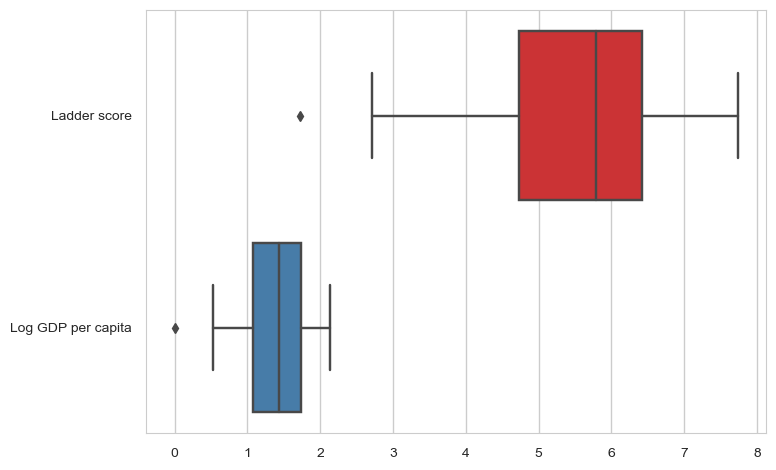

In [25]:
# Distribution of feature set2
list_features = ['Ladder score','Log GDP per capita']
sns.boxplot(data=df2024.loc[:,list_features], orient='h',palette='Set1')
plt.show()

As a result, while life satisfaction is more stable and consistent across countries, there are significant differences in levels of economic well-being.

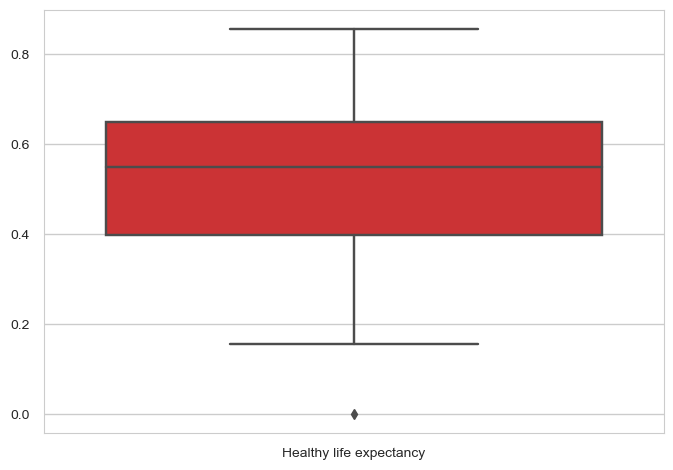

In [26]:
# Distribution of feature set3
list_features = ['Healthy life expectancy']
sns.boxplot(data=df2024.loc[:,list_features], orient='v',palette='Set1')
plt.show()

As a result, healthy life expectancy is generally consistent across countries, but there are notable deviations in some countries

# Happiest and Unhappiest Countries in 2024


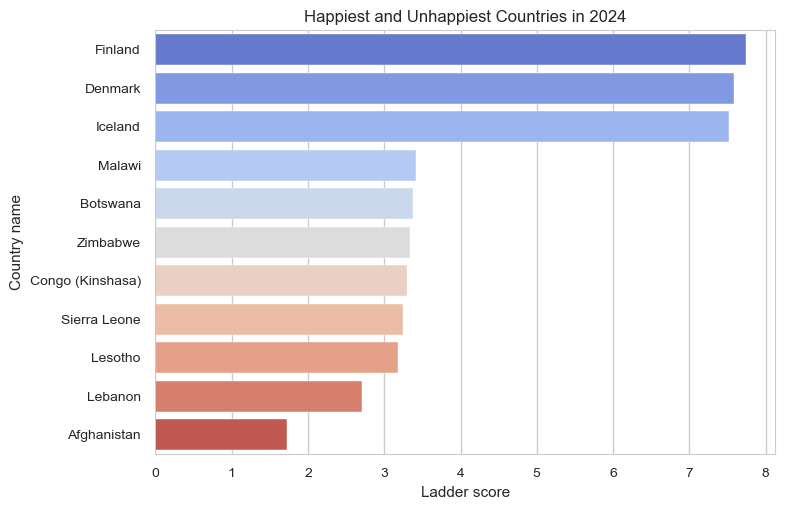

In [27]:
df2024_happiest_unhappiest = df2024[(df2024.loc[:, 'Ladder score'] > 7.4) | (df2024.loc[:, 'Ladder score'] < 3.5)]
sns.barplot(x='Ladder score', y='Country name', data=df2024_happiest_unhappiest, palette='coolwarm')
plt.title('Happiest and Unhappiest Countries in 2024')
plt.show()

This bar plot displays the happiest and unhappiest countries in 2024. The countries are selected based on their Ladder scores, where scores greater than 7.4 represent the happiest countries, and scores lower than 3.5 represent the unhappiest ones.

Happiest countries generally have high life satisfaction due to factors like economic prosperity, social support, and freedom. In contrast, the unhappiest countries face challenges such as political, economic, or social issues.

The 'coolwarm' palette visually distinguishes between the happiest (cooler tones) and unhappiest (warmer tones) countries, making it easier to compare their levels of life satisfaction.

# Ladder Score Distribution by Regional Indicator


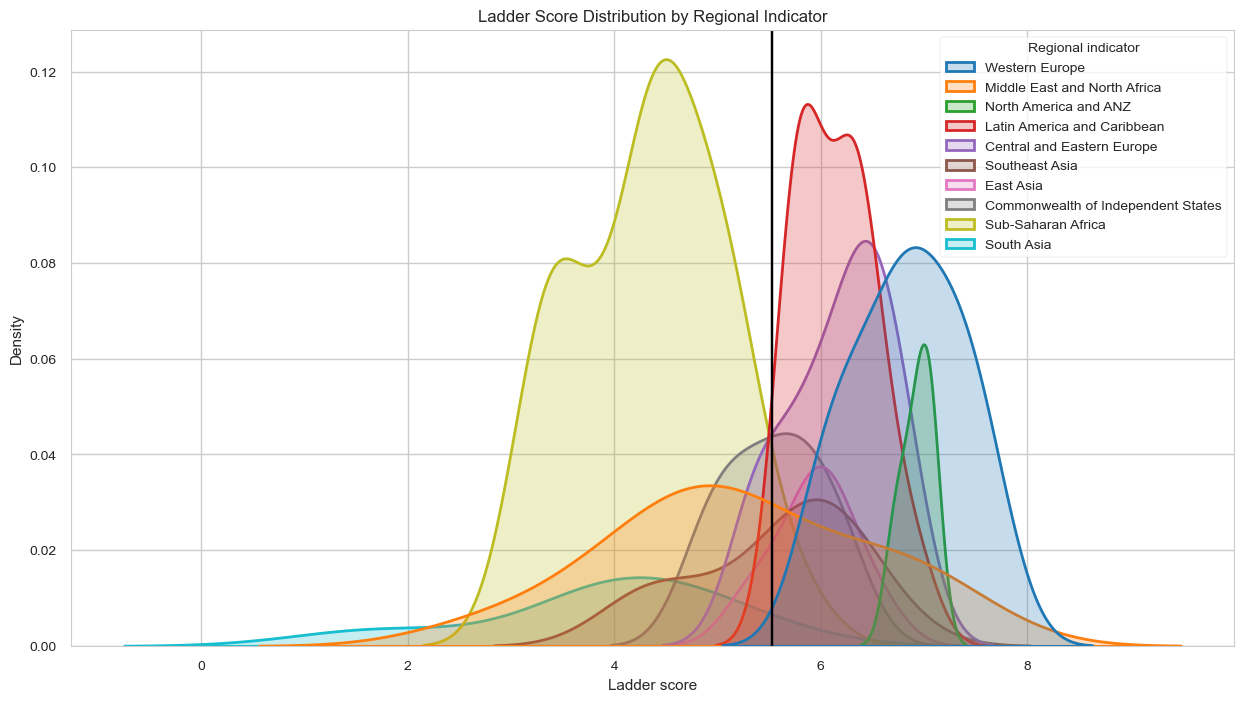

In [28]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=df2024, x='Ladder score', hue='Regional indicator', fill=True, linewidth=2)
plt.axvline(df2024['Ladder score'].mean(), c='black')
plt.title('Ladder Score Distribution by Regional Indicator')
plt.show()

This visualization shows the distribution of countries' happiness scores from the World Happiness Report using a Kernel Density Estimation (KDE) plot. The different colors represent each region (Regional Indicator) and depict the distribution of Ladder Score (happiness score).

  ~ The black vertical line indicates the mean happiness score across all countries. This line helps to highlight       how each region's average happiness score compares to the overall mean.
  
  ~ The KDE curves show the density of happiness scores within each region. The area under the curve reflects where     the scores are most concentrated for that region.
  
  ~ The width and shape of the curves indicate the spread of happiness scores. Narrow curves suggest a more             homogeneous distribution of scores within a region, while wider curves indicate greater variability.
  
From this graph, you can observe which regions have higher or lower happiness scores and how the regional distributions compare to the overall mean.

# Ladder Score Distribution by Countries in Map View


In [29]:
df.head(1)


Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724                7.35           0.451   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.414            0.258

In [30]:
fig = px.choropleth(df.sort_values('year'), locations='Country name', color='Life Ladder',
                   locationmode='country names', animation_frame='year')
fig.update_layout(title='Life Ladder Comparison by Countries')

fig.show()


Life Ladder Comparison by Countries (2008-2024)¶
This animated map compares the happiness levels of countries across the world from 2008 to 2024. The Life Ladder score represents the level of life satisfaction among people living in each country. Each country is color-coded based on their Life Ladder score, where higher values indicate happier populations and lower values suggest less life satisfaction.

Key Observations:

1.Regional Differences: The map reveals striking differences in happiness between regions. Notably, Northern European countries consistently rank high with strong Life Ladder scores, while some countries in Central Africa and the Middle East show lower scores.

2.Changes Over Time: The animation highlights changes over the years, with some countries steadily improving their happiness levels while others experience declines. For instance, countries with economic growth and improved social support systems have seen significant increases in Life Ladder scores.

3.Impact of Economic and Social Factors: According to the data, factors such as Log GDP per capita, social support, and freedom significantly influence a country's happiness score. Economically stronger countries with better social safety nets tend to have higher happiness levels.

4.Negative Influences: Countries with high perceptions of corruption and low healthy life expectancy tend to have lower happiness scores. These factors negatively affect the overall life satisfaction of the population.

This map serves as a powerful tool to analyze global happiness trends and understand why certain countries are happier than others.

# Most Generous and Most Ungenerous Countries in 2024


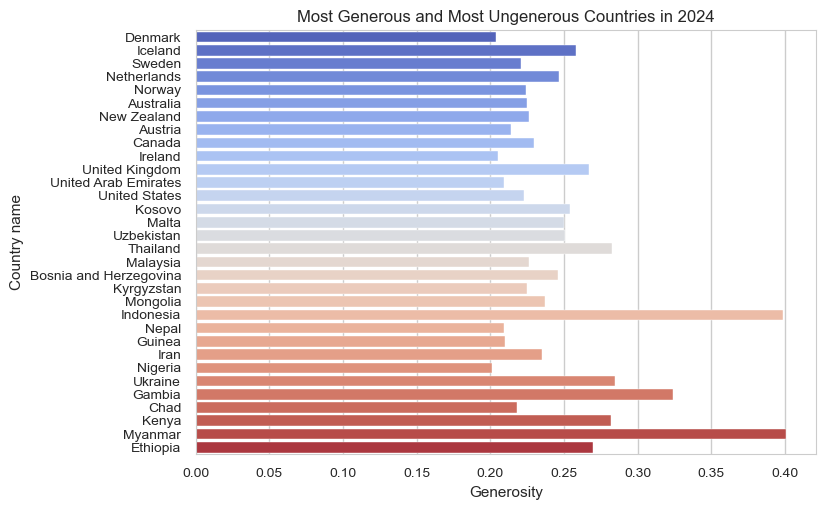

In [31]:
df2024_g = df2024[(df2024.loc[:,'Generosity'] > 0.2) | (df2024.loc[:,'Generosity'] < 0)]
sns.barplot(x='Generosity', y='Country name', data=df2024_g, palette='coolwarm')
plt.title('Most Generous and Most Ungenerous Countries in 2024')
plt.show()

Most Generous and Most Ungenerous Countries in 2024

This bar plot shows the most generous and least generous countries based on their Generosity scores in 2024.

  ~ The X-axis represents the Generosity values, while the Y-axis lists the country names.
  
  ~ Positive Generosity values (right side of the X-axis) indicate higher levels of generosity, whereas negative       Generosity values (left side of the X-axis) indicate lower levels of generosity.
  
  ~ The coolwarm color palette visually differentiates generosity levels. Warmer colors (red tones) typically represent lower generosity, while cooler colors (blue tones) indicate higher generosity.
  
From this plot, we can observe the significant differences in generosity among countries. Some countries have notably high generosity scores, while others fall into the negative range, indicating a lower level of generosity.

# Generous Distribution by Countries in Map View


In [32]:
fig= px.choropleth(df.sort_values('year'), locations='Country name', color='Generosity',
                   locationmode='country names', animation_frame='year')
fig.update_layout(title='Generosity Comparison by Countries')

fig.show()


Generosity Comparison by Countries (2008-2024)

This animated choropleth map visualizes the Generosity scores of countries from 2008 to 2024. Countries are color-coded based on their generosity scores, with higher scores represented by more intense colors and lower scores by lighter colors. The map allows us to observe the changes in generosity over time.

Key Insights:

1.Regional Generosity Trends: Some countries, especially in regions like Northern Europe, display consistently high generosity scores over the years. In contrast, certain areas may show decreasing trends in generosity.

2.Significant Yearly Changes: The animation highlights the yearly changes in generosity for each country, helping to identify which countries have improved or worsened in terms of generosity over time.

3.Economic and Social Influence: As generosity is often tied to social and economic factors, countries experiencing positive changes in these areas may see corresponding increases in their generosity scores.

This visualization offers valuable insights into global generosity trends and helps us understand how countries differ in terms of generosity over time.

# Generous Distribution by Regional Indicator in 2024


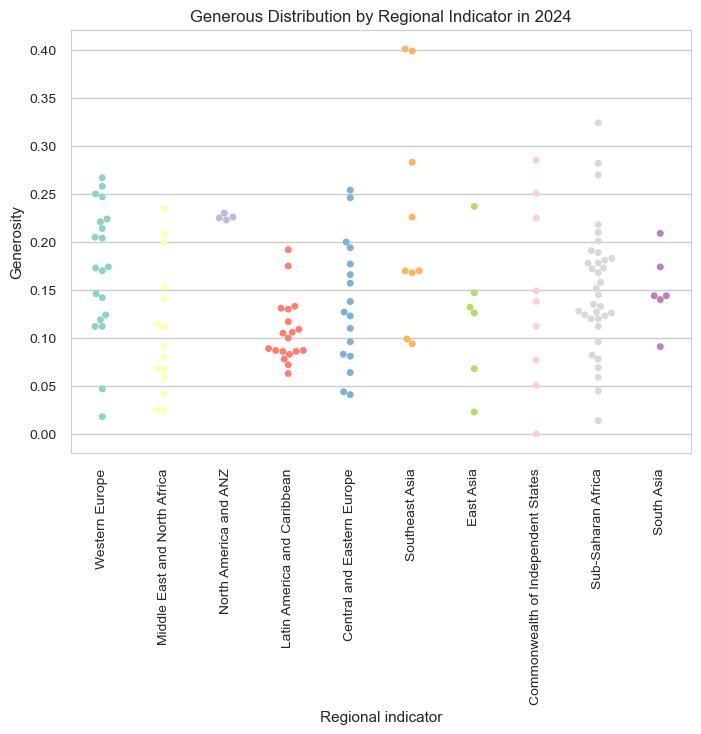

In [33]:
sns.swarmplot(x='Regional indicator', y='Generosity', data=df2024, palette='Set3')
plt.xticks(rotation=90)
plt.title('Generous Distribution by Regional Indicator in 2024')
plt.show()

Generous Distribution by Regional Indicator in 2024

This swarm plot visualizes the distribution of Generosity scores by Regional Indicator in 2024. Each point represents a country, showing how generosity is distributed across different regions.

Key Insights:
    
  ~ X-axis: Shows different regional indicators (such as Western Europe, Sub-Saharan Africa), allowing a comparison of generosity across regions.
    
  ~ Y-axis: Represents the Generosity scores of countries within each region. The higher the point, the higher the country's generosity score.
    
  ~ Densely clustered points in certain regions suggest that many countries within that region have similar generosity scores, while widely spread points indicate greater variability in generosity.

This plot highlights the variations in generosity across regions and helps us understand how generosity is distributed within different parts of the world.




# Relationship Between Happiness and Income


We will retrieve the population numbers of countries using the World Population 1960-2018 notebook. If population data that includes the year 2024 is found, the data can be updated again."

In [34]:
pop = pd.read_csv("/Users/mukeshkorri/Downloads/World-Happiness-Report/population_total_long.csv")
pop.head()

Country Name  Year    Count
0        Aruba  1960    54211
1  Afghanistan  1960  8996973
2       Angola  1960  5454933
3      Albania  1960  1608800
4      Andorra  1960    13411

In [35]:
country_continent = {}
for i in range(len(df2024)):
    country_continent[df2024['Country name'][i]] = df2024['Regional indicator'][i]

all_countries = df['Country name'].value_counts().reset_index()['Country name'].tolist()
all_countries_2024 = df2024['Country name'].value_counts().reset_index()['Country name'].tolist()

for x in all_countries:
    if x not in all_countries_2024:
        print(x)

Turkey
Belarus
Rwanda
Haiti
Turkmenistan
Syria
Qatar
Sudan
Trinidad and Tobago
Central African Republic
Burundi
Angola
Djibouti
South Sudan
Somaliland region
Somalia
Bhutan
Belize
Cuba
Suriname
Guyana
Oman
Maldives


In [36]:
# Incomplete data filling
df['region'] = ''
df.loc[df['Country name'] == 'Turkey', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'Belarus', 'region'] = 'Central and Eastern Europe'
df.loc[df['Country name'] == 'Rwanda', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'Haiti', 'region'] = 'North America and ANZ'
df.loc[df['Country name'] == 'Turkmenistan', 'region'] = 'Southeast Asia'
df.loc[df['Country name'] == 'Qatar', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'Sudan', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'Trinidad and Tobago', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'Central African Republic', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'Burundi', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'Angola', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'Djibouti', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'South Sudan', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'Somaliland region', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'Somalia', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'Bhutan', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'Belize', 'region'] = 'North America and ANZ'
df.loc[df['Country name'] == 'Cuba', 'region'] = 'Latin America and Caribbean'
df.loc[df['Country name'] == 'Suriname', 'region'] = 'Latin America and Caribbean'
df.loc[df['Country name'] == 'Guyana', 'region'] = 'Middle East and North Africa'
df.loc[df['Country name'] == 'Oman', 'region'] = 'South Asia'
df.loc[df['Country name'] == 'Maldives', 'region'] = 'Southeast Asia'

df.loc[~df['Country name'].isin(['Turkey', 'Belarus','Rwanda','Haiti','Turkmenistan','Syria','Qatar','Sudan','Trinidad and Tobago','Central African Republic',
'Burundi','Angola','Djibouti','South Sudan','Somaliland region','Somalia','Bhutan','Belize',
'Cuba','Suriname','Guyana','Oman','Maldives']), 'region'] = df['Country name'].map(country_continent)

region = df['region'].tolist()

In [37]:
df.head()


Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect      region  
0                      0.882            0.414            0.258  South Asia  
1                      0.850            0.481            0.237  South Asia  
2                      0.707            0.517            0.275  South Asia  
3                      0.731            0.480            0.267  South Asia  
4                      0.776            0.614            0.268  South Asia

In [38]:
# Delete mismatched data    
all_countries = df['Country name'].value_counts().reset_index()['Country name'].tolist()
all_countries_pop = pop['Country Name'].value_counts().reset_index()['Country Name'].tolist()

del_country = []
for x in all_countries:
    if x not in all_countries_pop:
        del_country.append(x)
del_country

['Kyrgyzstan',
 'Egypt',
 'Russia',
 'Venezuela',
 'South Korea',
 'Taiwan Province of China',
 'State of Palestine',
 'Iran',
 'Czechia',
 'Slovakia',
 'Yemen',
 'Congo (Brazzaville)',
 'Hong Kong S.A.R. of China',
 'Laos',
 'Ivory Coast',
 'Congo (Kinshasa)',
 'Syria',
 'Gambia',
 'Somaliland region']

In [39]:
df.columns


Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'region'],
      dtype='object')

In [40]:
pop_df = df[['Country name','year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption','region']].copy()
pop_df.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption      region  
0                      0.882  South Asia  
1                      0.850  South Asia  
2                      0.707  South Asia  
3                      0.731  South Asia  
4                      0.776  South Asia

In [41]:
# Simplify
del_countries = ['Country1', 'Country2', 'Country3']  # Replace with the actual countries to exclude

pop_df = pop_df[~pop_df["Country name"].isin(del_countries)]
pop_df = pop_df[~pop_df["year"].isin([2005, 2006, 2007, 2018, 2019, 2020, 2021, 2022, 2023])]

pop_dict = {x: {} for x in range(2008, 2018)}

for i in range(len(pop)):
    year = pop["Year"][i]
    if year in range(2008, 2018):
        country = pop["Country Name"][i]
        count = pop["Count"][i]
        pop_dict[year][country] = count


In [42]:
# Rebuild population data and add it as a new column
population = []

for i in pop_df.index:
    year = pop_df["year"][i]
    country = pop_df["Country name"][i]

    # Check if the year and country exist in pop_dict before accessing
    if year in pop_dict and country in pop_dict[year]:
        population.append(pop_dict[year][country])
    else:
        population.append(None)  # Append None or a default value if not found
pop_df["population"] = population


In [43]:
pop_df.head()


Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption      region  population  
0                      0.882  South Asia  27722276.0  
1                      0.850  South Asia  28394813.0  
2                      0.707  South Asia  29185507.0  
3                      0.731  South Asia  30117413.0  
4                      0.776  South Asia  31161376.0

In [44]:
pop_df['population'] = pop_df['population'].fillna(0)

# Create the scatter plot with animation
fig = px.scatter(
    pop_df, 
    x='Log GDP per capita', 
    y='Life Ladder', 
    animation_frame='year',
    animation_group='Country name', 
    size='population',
    template='plotly_white',
    color='region', 
    hover_name='Country name',
    size_max=60
)

fig.update_layout(title='Life Ladder and Log GDP per capita')

fig.show()


Plot Analysis: Life Ladder and Log GDP per Capita This plot shows the relationship between the economic prosperity of countries (Log GDP per capita) and life satisfaction (Life Ladder) over time. Each bubble represents a country, and the size of the bubbles reflects the population of that country.

Key Findings: Log GDP per Capita: The plot indicates a strong correlation between Log GDP per capita (economic prosperity) and Life Ladder (life satisfaction). As income per capita increases, life satisfaction generally rises as well. Regional Differences: The colors represent the different regions. For example, Western European countries typically have higher Log GDP per capita and life satisfaction, while some countries in Central Africa tend to have lower values for both metrics. Changes Over Time: The animation displays changes from 2008 to 2018, allowing us to observe shifts in GDP and life satisfaction over time. Notably, some developing countries experience increases in both economic growth and life satisfaction during this period. Impact of Population: The size of the bubbles reflects population size. Larger bubbles indicate more populous countries, but the plot shows no direct relationship between population size and life satisfaction or GDP, highlighting the distinct experiences of various countries. Anomalies: In some cases, countries with high GDP per capita still report relatively low life satisfaction. For instance, certain oil-rich nations exhibit strong economic performance but lower life satisfaction compared to countries with similar GDP. This suggests that factors like social support, freedom, or corruption perceptions also play a significant role in determining life satisfaction. Overall Evaluation: This plot demonstrates that while economic prosperity has a significant impact on life satisfaction, social factors also play a crucial role. The data over time highlights that we must consider more than just economic indicators when assessing well-being, including social stability, political freedom, and corruption.

# Relationship Between Happiness and Freedom


In [45]:
fig = px.scatter(pop_df, x='Freedom to make life choices', y='Life Ladder', animation_frame='year',
                animation_group='Country name', size='population',template='plotly_dark',
                color='region',hover_name='Country name',size_max=60)
fig.update_layout(title='Life Ladder and Freedom')
fig.show()


Plot Analysis: Life Ladder and Freedom to Make Life Choices This plot illustrates the relationship between Life Ladder (life satisfaction) and Freedom to make life choices across different countries, with data spanning from 2008 to 2018. Each country is represented by a bubble, where the bubble size corresponds to the country's population, and the colors represent different regions.

Key Insights: Positive Correlation Between Freedom and Life Satisfaction: Countries with higher levels of freedom to make life choices generally report higher life satisfaction. This trend suggests that personal freedom is a key factor in improving overall happiness and well-being. Regional Differences: Western European and North American countries tend to score higher on both axes, indicating that these regions enjoy both high freedom and life satisfaction. In contrast, countries from regions such as Sub-Saharan Africa or the Middle East tend to score lower, indicating that less freedom to make life choices corresponds to lower life satisfaction. Time Progression: The animation shows that over time, some developing countries experience improvements in both freedom and life satisfaction, although the progress is gradual. This indicates that economic development and improvements in governance and social structures can lead to increased freedom and happiness over time. Anomalies: Some countries may exhibit relatively high freedom but lower life satisfaction, or vice versa. For example, some countries may offer substantial personal freedom but face economic or social challenges that prevent life satisfaction from reaching its full potential. Conversely, certain wealthier nations may show relatively high life satisfaction despite having moderate freedom levels due to other compensating factors like economic security or strong social support systems. Population Size: The size of the bubbles, which represents population, shows that larger countries, such as India and China, may vary widely in terms of freedom and life satisfaction. The scatter plot helps to highlight the diverse experiences of populations in countries with large and growing populations. Overall Evaluation: This plot demonstrates a strong relationship between personal freedom and happiness. Countries that promote individual freedom and offer more autonomy to their citizens tend to have higher life satisfaction. However, the plot also highlights that other factors—such as economic conditions, social stability, and governance—can influence life satisfaction independently of freedom.




# Relationship Between Happiness and Corruption


In [46]:
fig = px.scatter(pop_df, x='Perceptions of corruption', y='Life Ladder', animation_frame='year',
                animation_group='Country name', size='population',
                color='region',hover_name='Country name',size_max=60)
fig.update_layout(title='Life Ladder and Corruption')
fig.show()



# Relationship Between Features


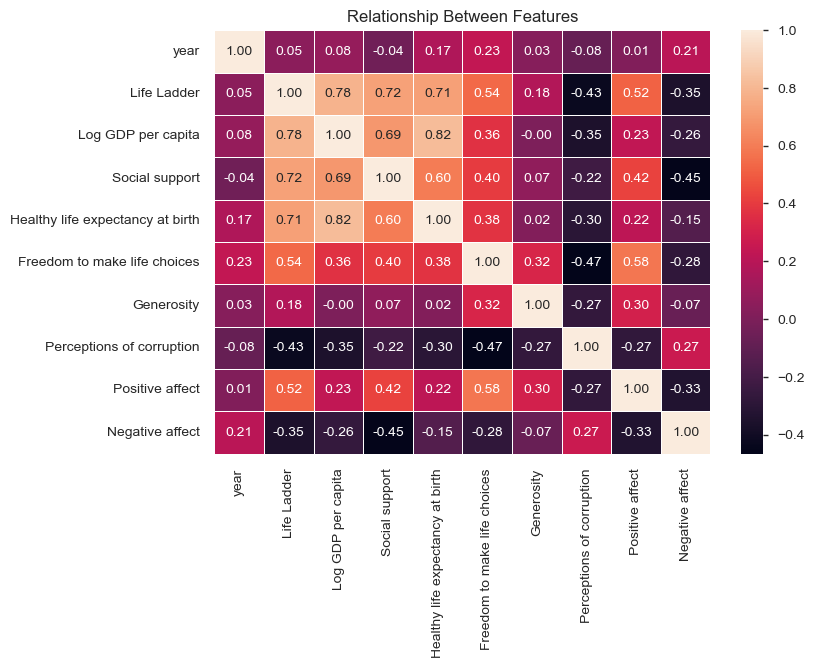

In [47]:
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths= .7)
plt.title('Relationship Between Features')
plt.show()


Key Insights from the Correlation Heatmap: Strong Positive Correlations: Log GDP per capita shows a strong positive correlation with Life Ladder (life satisfaction), indicating that as a country's GDP per capita increases, so does its life satisfaction. Healthy life expectancy at birth also correlates positively with Life Ladder, suggesting that higher life expectancy tends to align with greater life satisfaction. Moderate Correlations: Social support and Freedom to make life choices show moderate correlations with Life Ladder, indicating these social factors also play significant roles in determining life satisfaction. There is also a noticeable positive correlation between Log GDP per capita and Social support, which suggests that wealthier countries often have stronger social safety nets. Low or Negative Correlations: Perceptions of corruption tends to show a slight negative correlation with life satisfaction, suggesting that higher corruption perceptions can lower happiness, though the correlation is weaker compared to other factors. Generosity does not show strong correlations with other variables, indicating that its impact on overall life satisfaction might be more nuanced or influenced by other external factors. Conclusion: The heatmap provides a clear visualization of how different factors are interrelated, with economic indicators like GDP and life expectancy showing the strongest links to happiness, while social factors like freedom, corruption perceptions, and support systems also play important but slightly lesser roles.

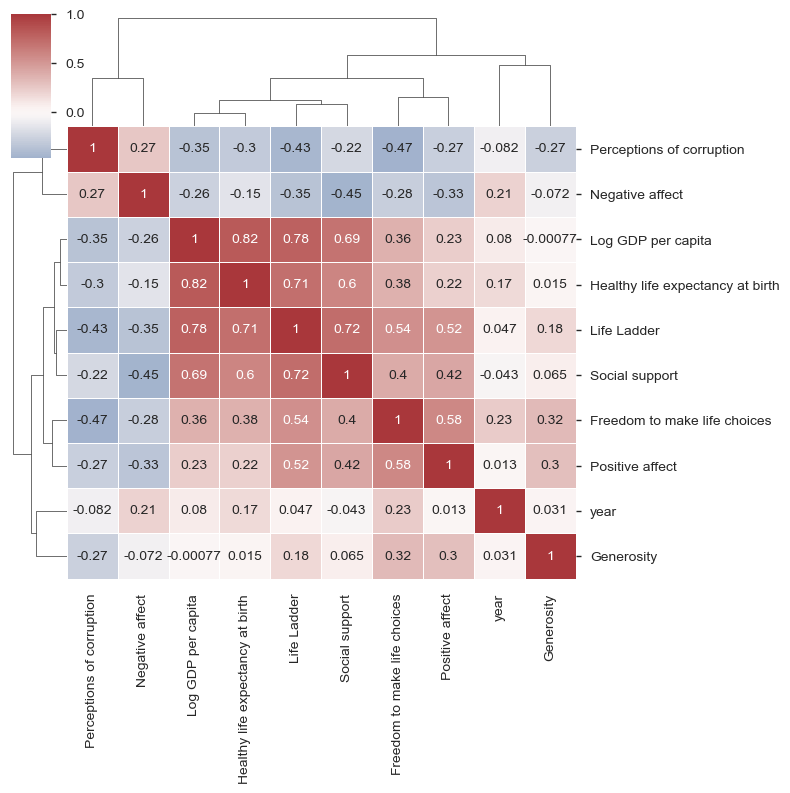

In [48]:
sns.clustermap(correlation_matrix, center=0, cmap='vlag', dendrogram_ratio=(0.1,0.2), annot=True, linewidths=.7,figsize=(8,8))
plt.show()

# Business Problem Questions Solved Using ML Tools



# 1.We have to predict happiness score of country, which is regression preoblem. Also after applying we will analyze perofrmance of that model in detail


# Regression Algorothm 

~ Linear Regression

~ Multiple Reression

~ Simple Linear & Multiple Linear Regression - Model Tuning





# For Classification we convert score column to binary label

Clssification Algorithms ~ Logistic Regression

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/Users/mukeshkorri/Downloads/World-Happiness-Report/World-happiness-report-updated_2024.csv', encoding='ISO-8859-1')


In [50]:
df.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.414            0.258  
1                      0.850            0.481            0.237  
2                      0.707            0.517            0.275  
3                      0.731            0.480            0.267  
4                      0.776            0.614            0.268

In [51]:
df2024 = pd.read_csv('/Users/mukeshkorri/Downloads/World-Happiness-Report/World-happiness-report-2024.csv')


In [52]:
df2024.head()


Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277               1.803           1.513                    0.740   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.859       0.142                      0.546   
1                         0.823       0.204                      0.548   
2                         0.819       0.258                      0.182   
3                         0.838       0.221                      0.524   
4                         0.641       0.153                      0.193   

   Dystopia + residual  
0                2.082  
1                1.881  
2                2.050  
3                1.658  
4                2.298

In [53]:
df2024.describe().T


count      mean       std    min      25%  \
Ladder score                  143.0  5.527580  1.170717  1.721  4.72600   
upperwhisker                  143.0  5.641175  1.155008  1.775  4.84550   
lowerwhisker                  143.0  5.413972  1.187133  1.667  4.60600   
Log GDP per capita            140.0  1.378807  0.425098  0.000  1.07775   
Social support                140.0  1.134329  0.333317  0.000  0.92175   
Healthy life expectancy       140.0  0.520886  0.164923  0.000  0.39800   
Freedom to make life choices  140.0  0.620621  0.162492  0.000  0.52750   
Generosity                    140.0  0.146271  0.073441  0.000  0.09100   
Perceptions of corruption     140.0  0.154121  0.126238  0.000  0.06875   
Dystopia + residual           140.0  1.575914  0.537459 -0.073  1.30825   

                                 50%      75%    max  
Ladder score                  5.7850  6.41600  7.741  
upperwhisker                  5.8950  6.50750  7.815  
lowerwhisker                  5.6740  6.31900  7.667  
Log GDP per capita            1.4315  1.74150  2.141  
Social support                1.2375  1.38325  1.617  
Healthy life expectancy       0.5495  0.64850  0.857  
Freedom to make life choices  0.6410  0.73600  0.863  
Generosity                    0.1365  0.19250  0.401  
Perceptions of corruption     0.1205  0.19375  0.575  
Dystopia + residual           1.6445  1.88175  2.998

In [54]:
df2024.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [55]:
df2024.rename(columns={
    "Overall rank": "rank",
    "Country name": "country",
    "Ladder score": "score",
    "Log GDP per capita": "gdp",
    "Social support": "social",
    "Healthy life expectancy": "healthy",
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "corruption"
},inplace=True)
df2024 = df2024.drop(['upperwhisker', 'lowerwhisker','Regional indicator'], axis=1)

In [56]:
df2024.columns[df2024.isnull().any()]

df2024.isnull().sum()

df2024[df2024["corruption"].isnull()]

df2024 = df2024.dropna(subset=['corruption'])

# Verify that there are no more missing values in the 'corruption' column
df2024[df2024["corruption"].isnull()]

Empty DataFrame
Columns: [country, score, gdp, social, healthy, freedom, generosity, corruption, Dystopia + residual]
Index: []

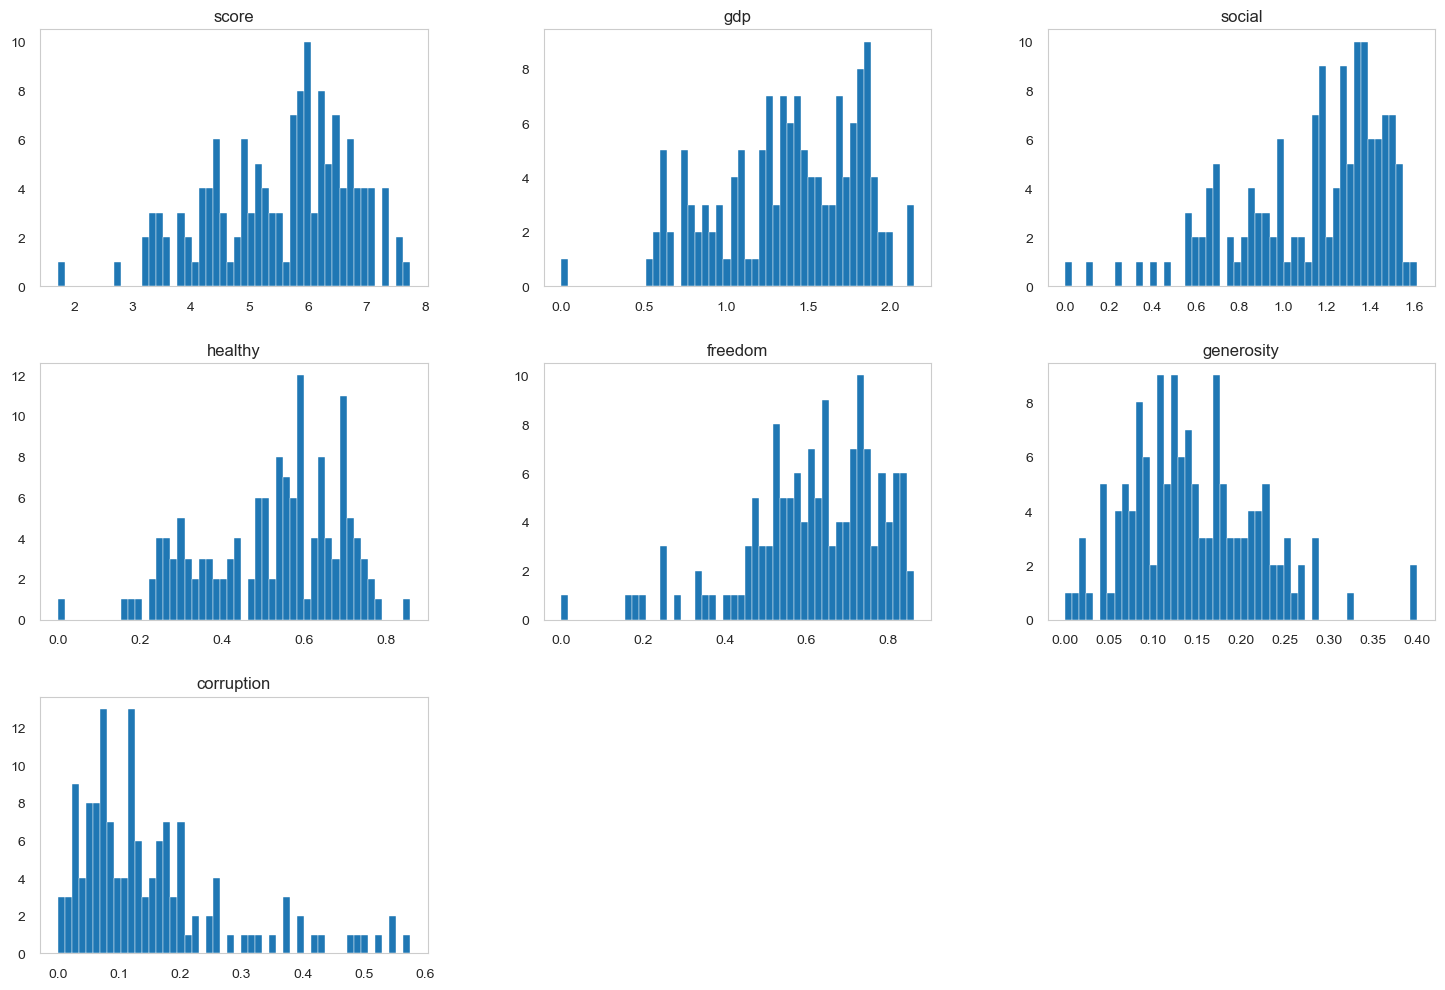

In [57]:
df2024[[
    "country",
     "score",
     "gdp",
    "social",
    "healthy",
    "freedom",
   "generosity",
     "corruption"]].hist(figsize=(18,12), bins=50, grid=False);


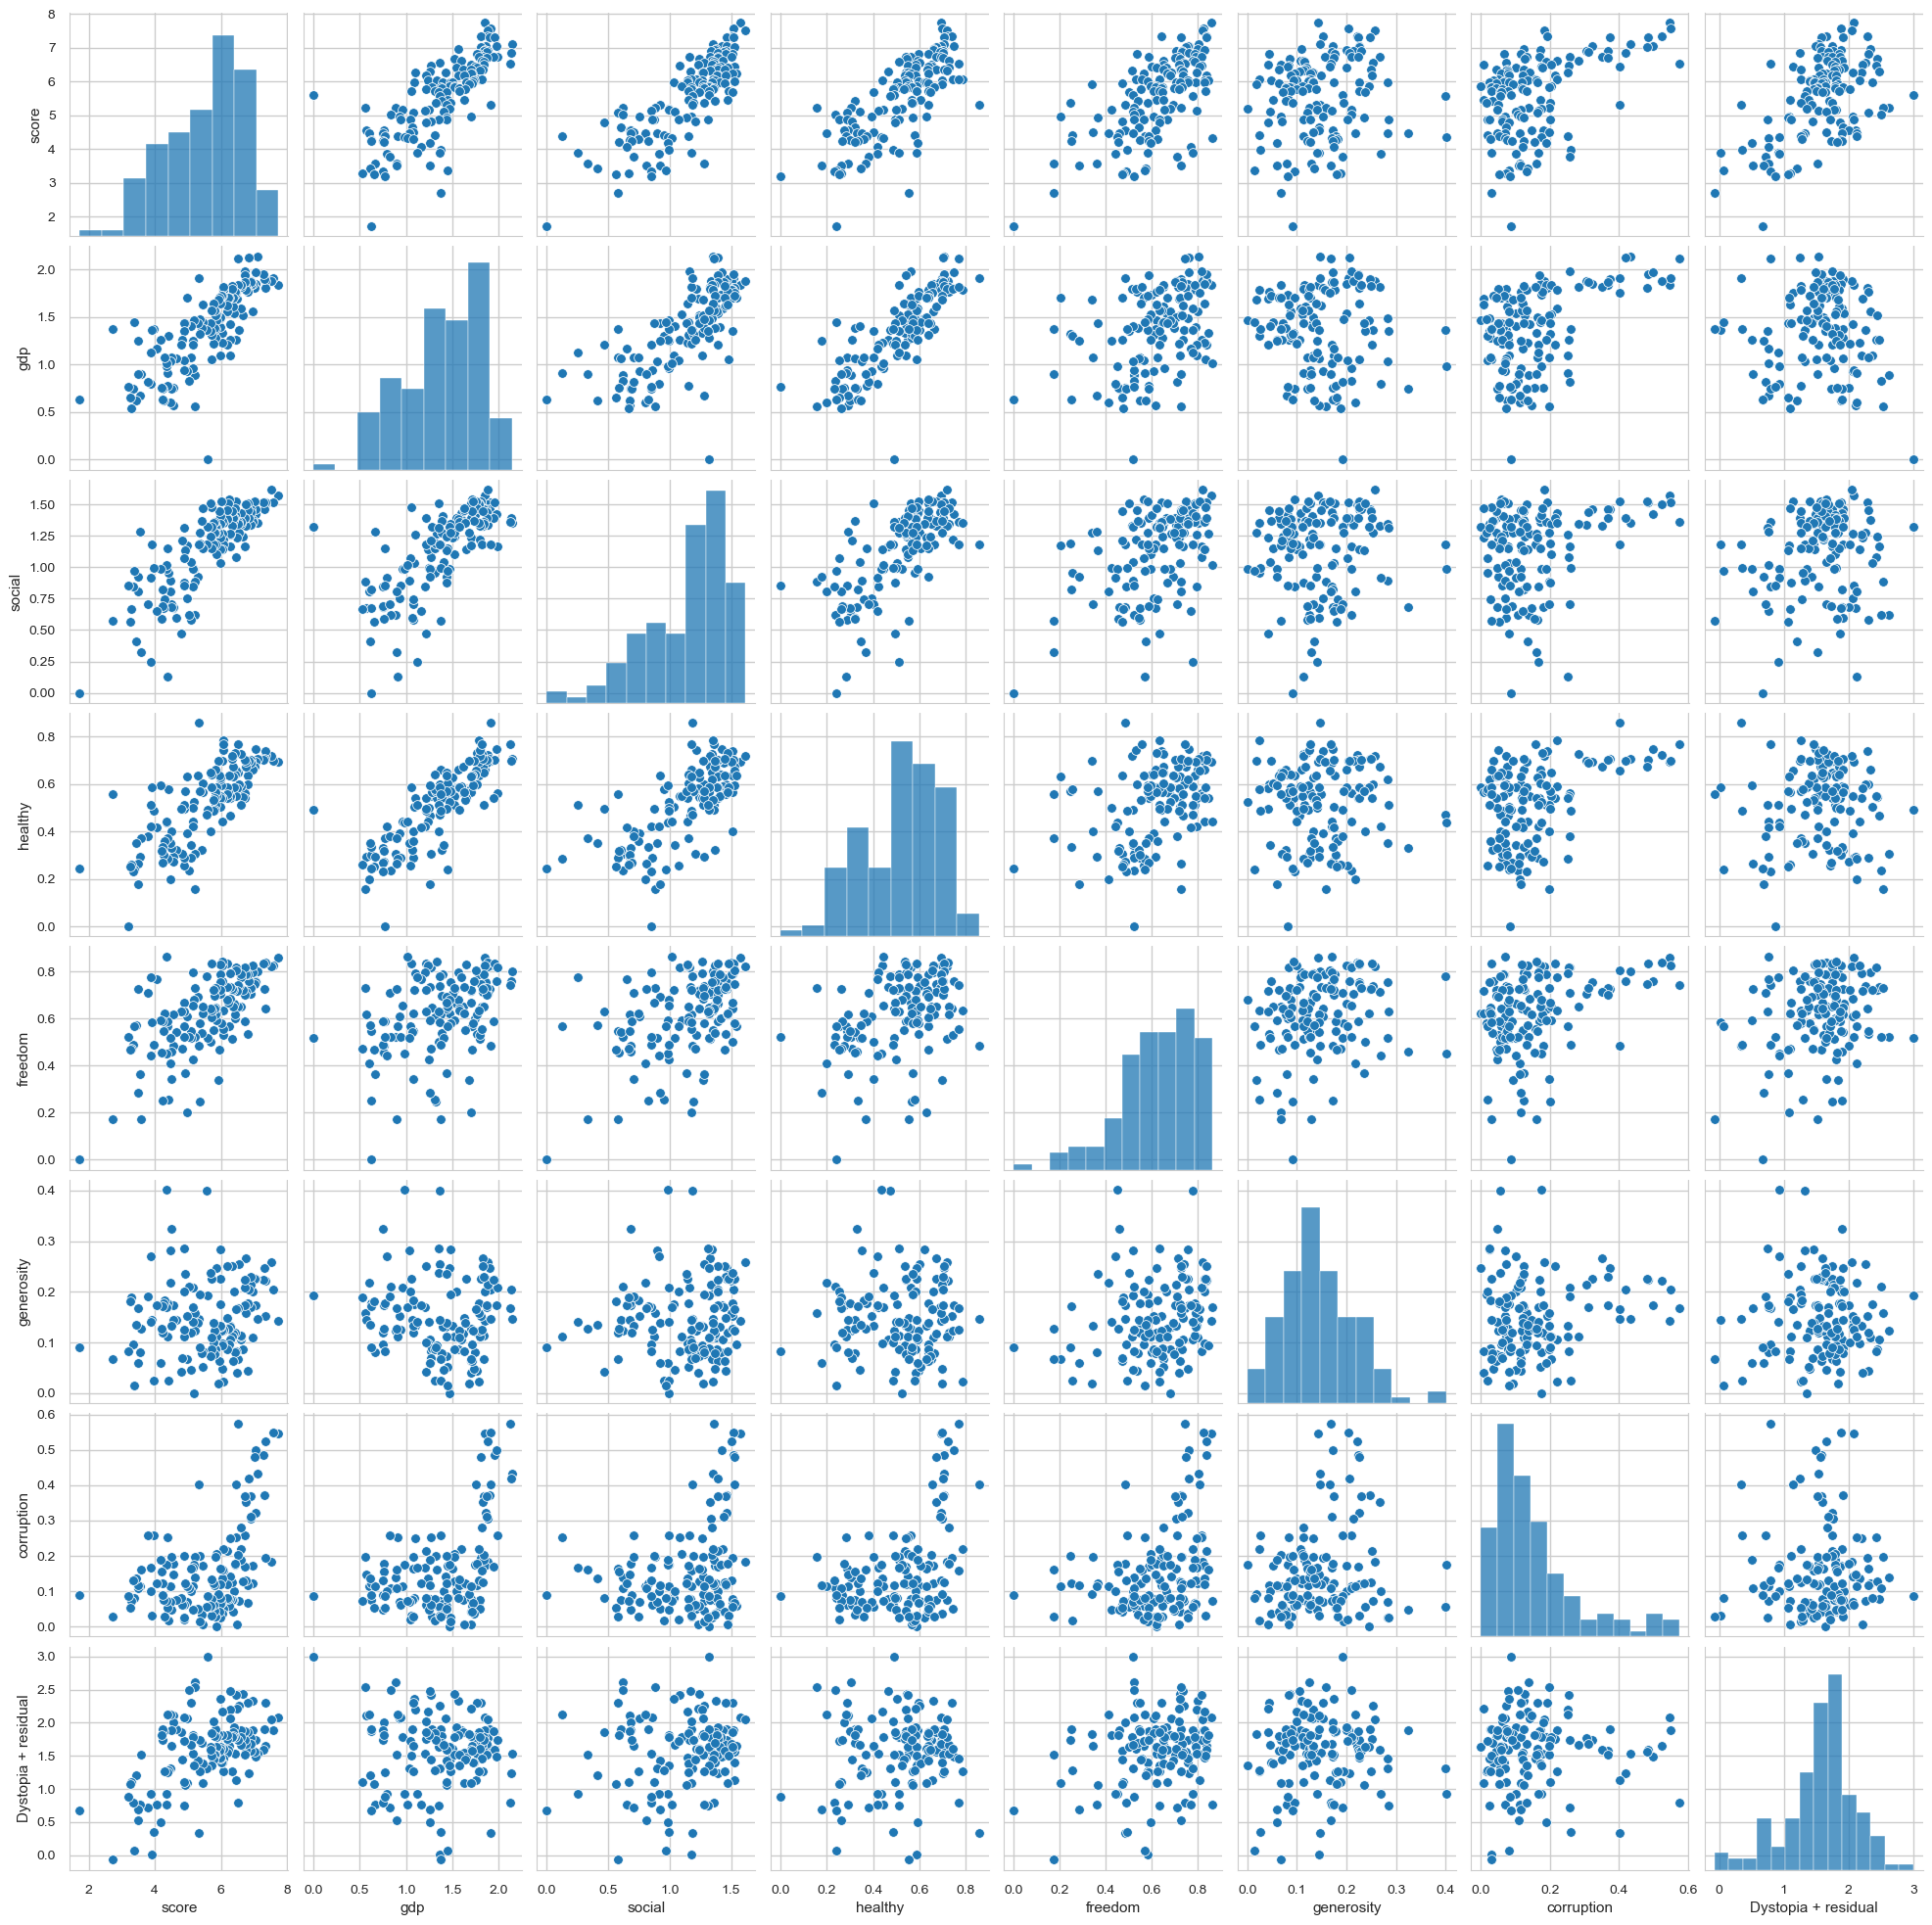

In [58]:
sns.pairplot(df2024);


# Inconsistent Observation


95% of a machine learning model is said to be preprocessing and 5% is model selection. For this we need to teach the data to the model correctly. In order to prepare the available data for machine learning, we must apply certain pre-processing methods. One of these methods is the analysis of outliers. The outlier is any data point that is substantially different from the rest of the observations in a data set. In other words, it is the observation that goes far beyond the general trend.

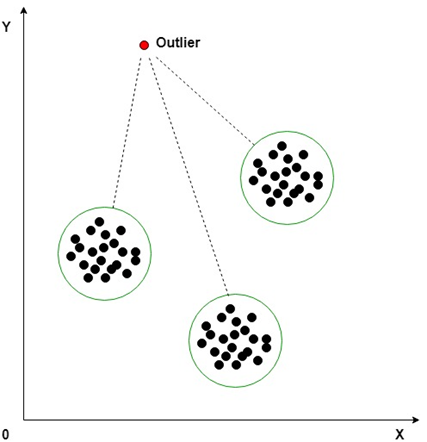

Outlier values behave differently from other data models and they increase the error with overfitting, so the outlier model must be detected and some operations must be performed on it.

# 1.Using Box Graph
We can see contradictory observations with many visualization techniques. One of them is the box chart. If there is an outlier, this is drawn as the point, but the other population is grouped together and displayed in boxes.

In [59]:
df = df2024.copy()
df = df.select_dtypes(include=["float64","int64"])
df.head()

score    gdp  social  healthy  freedom  generosity  corruption  \
0  7.741  1.844   1.572    0.695    0.859       0.142       0.546   
1  7.583  1.908   1.520    0.699    0.823       0.204       0.548   
2  7.525  1.881   1.617    0.718    0.819       0.258       0.182   
3  7.344  1.878   1.501    0.724    0.838       0.221       0.524   
4  7.341  1.803   1.513    0.740    0.641       0.153       0.193   

   Dystopia + residual  
0                2.082  
1                1.881  
2                2.050  
3                1.658  
4                2.298

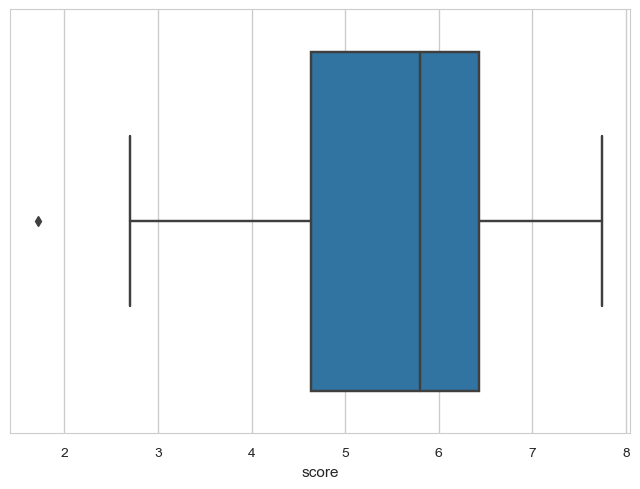

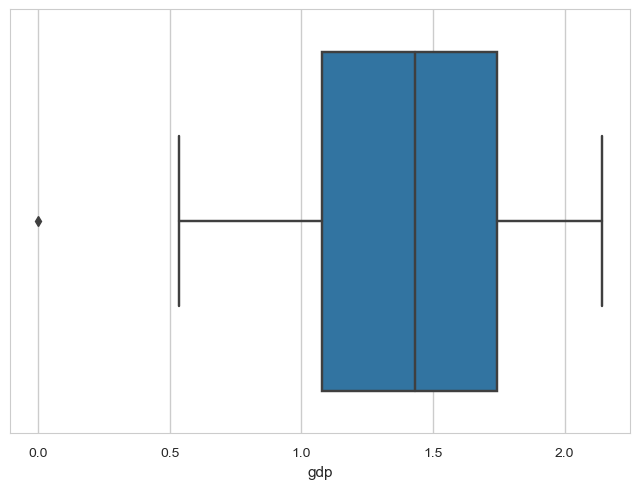

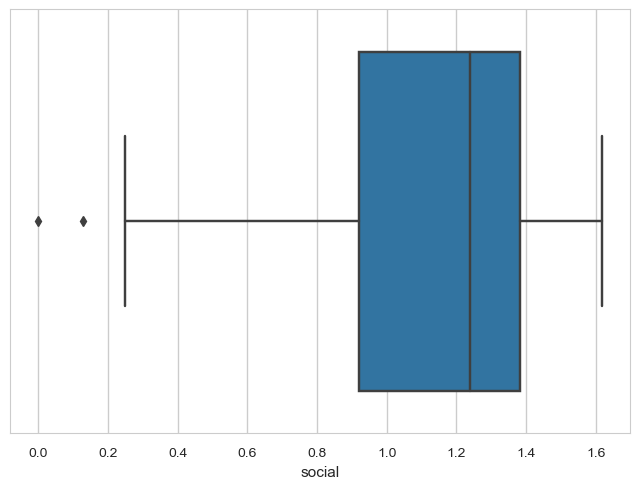

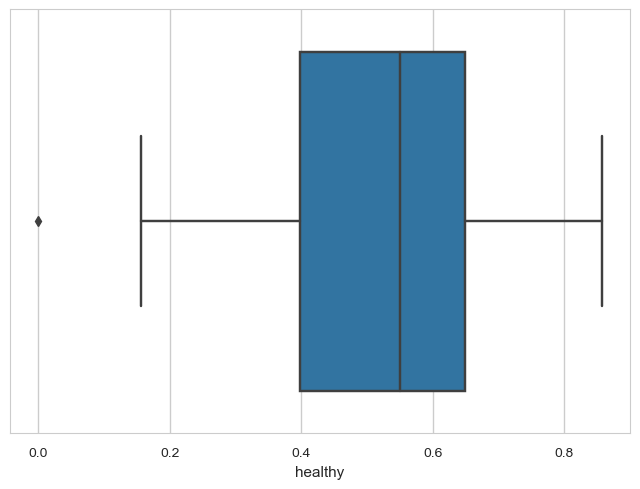

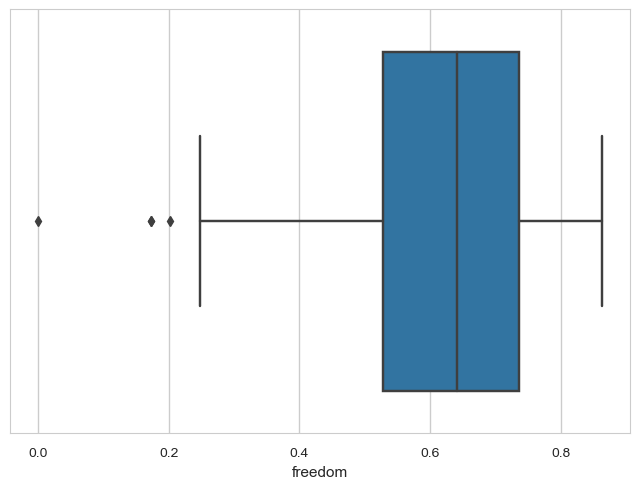

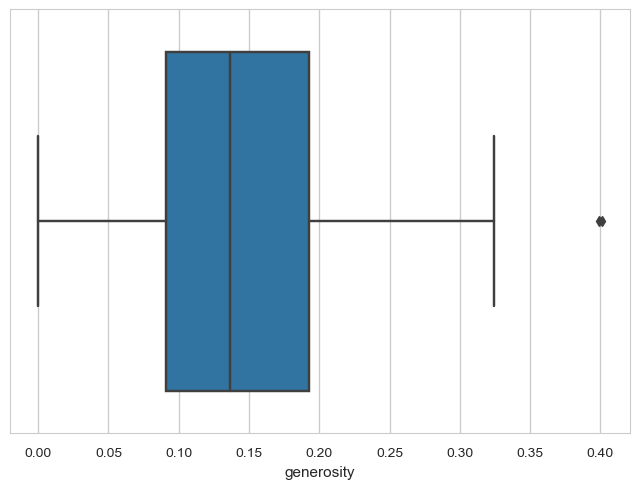

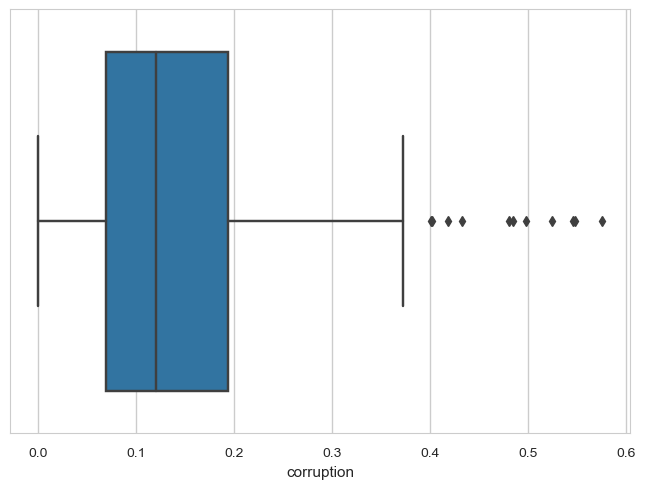

In [60]:
column_list = ["score","gdp","social","healthy","freedom","generosity","corruption"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

We have observed that there are outliers in the "social" and "corruption" column. This may cause us to negatively affect us while training our data set.

In [61]:
# for corruption
df_table = df["corruption"]

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound is -0.11875
upper bound is 0.38125
Q1:  0.06875
Q3:  0.19375


In [62]:
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector


0       True
1       True
2      False
3       True
4      False
       ...  
138    False
139    False
140    False
141    False
142    False
Name: corruption, Length: 140, dtype: bool

In [63]:
outliers_vector = df_table[outliers_vector]
outliers_vector.index.values

array([ 0,  1,  3,  6,  7,  8, 10, 16, 29, 33, 85])

In [64]:
df_table = df2024.copy()
df_table["corruption"].iloc[outliers_vector.index.values] = df_table["corruption"].mean()
df_table["corruption"].iloc[outliers_vector.index.values]

0     0.154121
1     0.154121
3     0.154121
6     0.154121
7     0.154121
8     0.154121
10    0.154121
16    0.154121
29    0.154121
33    0.154121
86    0.154121
Name: corruption, dtype: float64

In [65]:
df2024 = df_table


# Simple Linear Regressions
Simple linear regression is a statistical method that allows us to summarize and analyze the relationships between two continuous (quantitative) variables:

# score - gdp
Firstly let's observe the relationship between gdp and score with the help of graphics.

-> independent variable : x

-> dependent variable : y

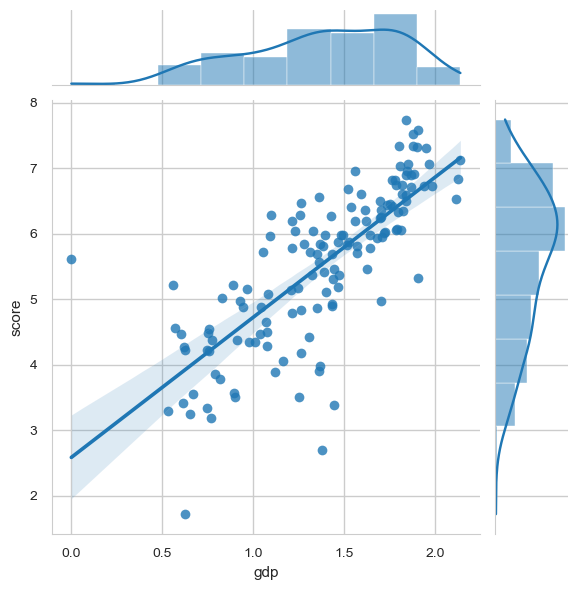

In [66]:
sns.jointplot(x="gdp",y="score",data=df_table,kind="reg")
plt.show()

In [67]:
from sklearn.linear_model import LinearRegression

X = df2024[["gdp"]]
X.head

<bound method NDFrame.head of        gdp
0    1.844
1    1.908
2    1.881
3    1.878
4    1.803
..     ...
138  0.534
139  0.654
140  0.771
141  1.377
142  0.628

[140 rows x 1 columns]>

In [68]:
y = df2024[["score"]]
y.head

<bound method NDFrame.head of      score
0    7.741
1    7.583
2    7.525
3    7.344
4    7.341
..     ...
138  3.295
139  3.245
140  3.186
141  2.707
142  1.721

[140 rows x 1 columns]>

In [69]:
reg = LinearRegression()
model = reg.fit(X,y)
print("intercept: ", model.intercept_)
print("coef: ", model.coef_)
print("rscore. ", model.score(X,y))

intercept:  [2.58646614]
coef:  [[2.13548844]]
rscore.  0.5905979099399622


rscore meaning:

For example, the gdp argument used here describes 63% of the data.

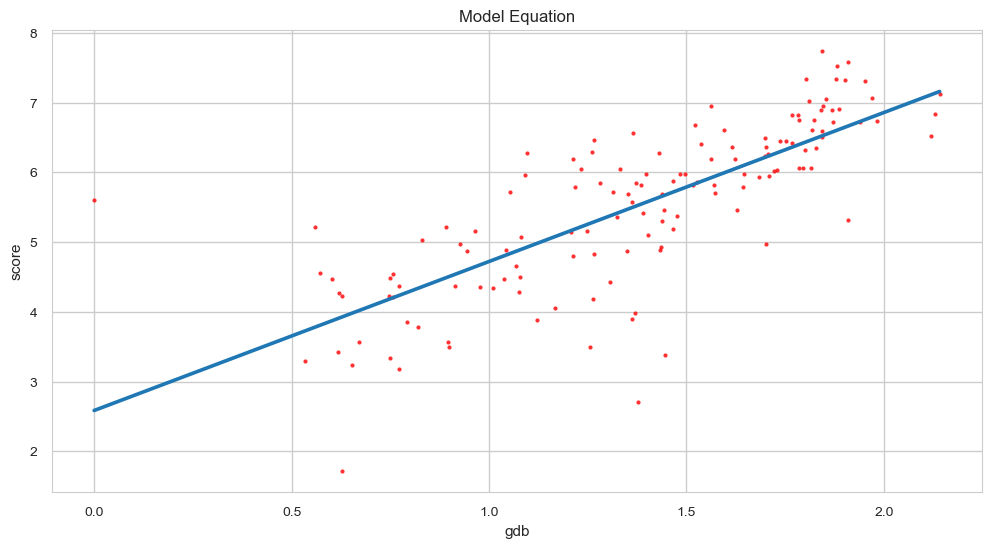

In [70]:
# prediction
plt.figure(figsize=(12,6))
g = sns.regplot(x=df2024["gdp"],y=df2024["score"],ci=None,scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_ylabel("score")
g.set_xlabel("gdb")
plt.show()

# What we want to do here is;
~ For example, to answer the question of what is the happiness level of a country with a gdp value of 1.

~ In other words, to estimate the desired value with the existing data set.

In [71]:
# model.intercep_ + model.coef_ * 1
model.predict([[1]])

array([[4.72195458]])

In [72]:
gdb_list = [[0.25],[0.50],[0.75],[1.00],[1.25],[1.50]]
model.predict(gdb_list)
for g in gdb_list:
    print("The happiness value of the country with a gdp value of ",g,": ",model.predict([g]))

The happiness value of the country with a gdp value of  [0.25] :  [[3.12033825]]
The happiness value of the country with a gdp value of  [0.5] :  [[3.65421036]]
The happiness value of the country with a gdp value of  [0.75] :  [[4.18808247]]
The happiness value of the country with a gdp value of  [1.0] :  [[4.72195458]]
The happiness value of the country with a gdp value of  [1.25] :  [[5.25582669]]
The happiness value of the country with a gdp value of  [1.5] :  [[5.7896988]]


Let's create a class and make the job easier.

In [73]:
def linear_reg(col, text, prdctn):
    # Ensure the column exists
    if col not in df_table.columns:
        print(f"Column '{col}' not found in the dataframe.")
        return

    sns.jointplot(x=col, y="score", data=df_table, kind="reg")
    plt.show()

    X = df_table[[col]]  # Predictor variable
    y = df_table[["score"]]  # Target variable

    reg = LinearRegression()
    model = reg.fit(X, y)

    plt.figure(figsize=(12, 6))
    g = sns.regplot(x=df_table[col], y=df_table["score"], ci=None, scatter_kws={'color': 'r', 's': 9})
    g.set_title("Model Equation")
    g.set_ylabel("Score")
    g.set_xlabel(col)
    plt.show()

    prediction = model.predict([[prdctn]])
    print(f"{text} {prediction[0][0]}")


# score - social

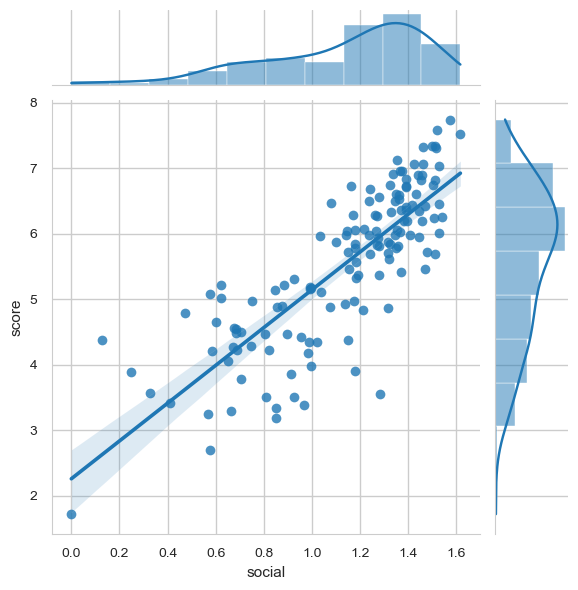

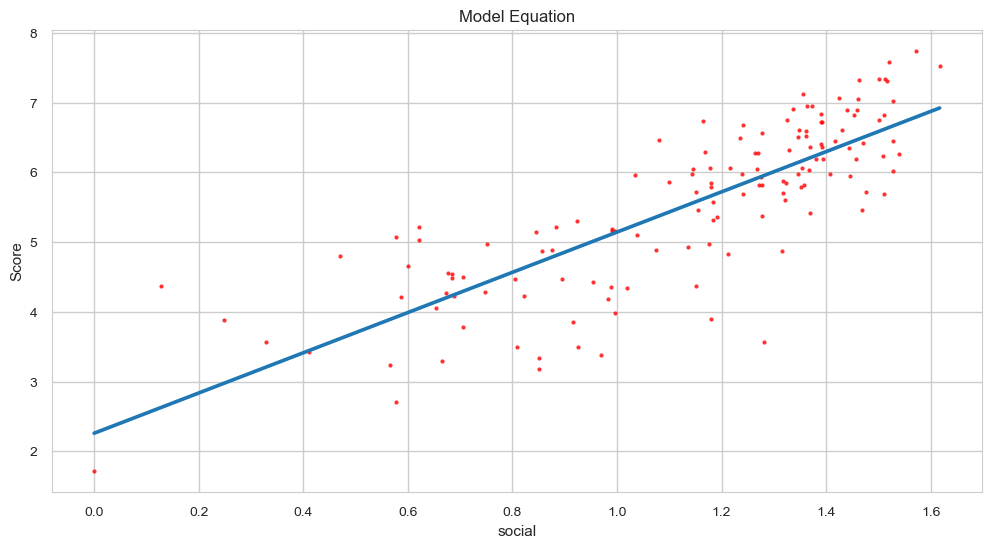

The happiness value of the country whose sociability value is 2: 8.026729172404725


In [74]:
linear_reg("social","The happiness value of the country whose sociability value is 2:",2)

In [75]:
column_list = ["score","gdp","social","healthy","freedom","generosity","corruption"]


# score - healthy

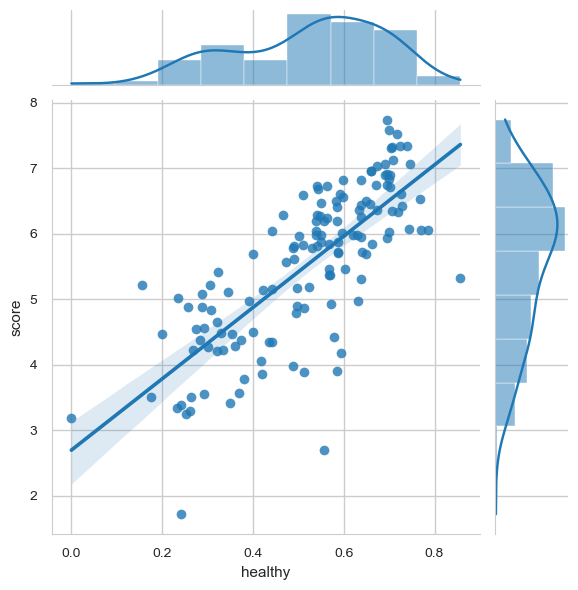

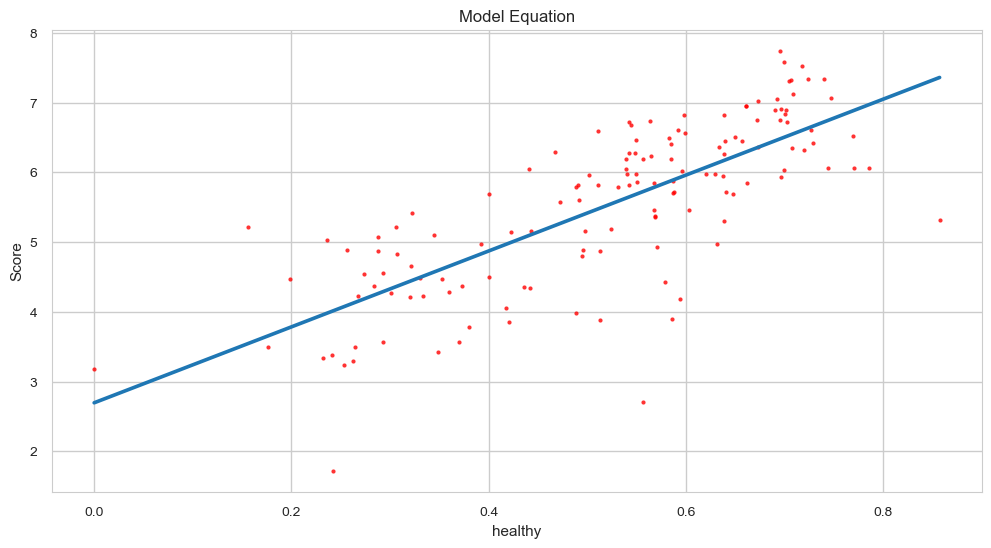

The happiness value of the country whose healthiest value is 1.20: 9.225961041554903


In [76]:
linear_reg("healthy","The happiness value of the country whose healthiest value is 1.20:",1.20)

# score - freedom

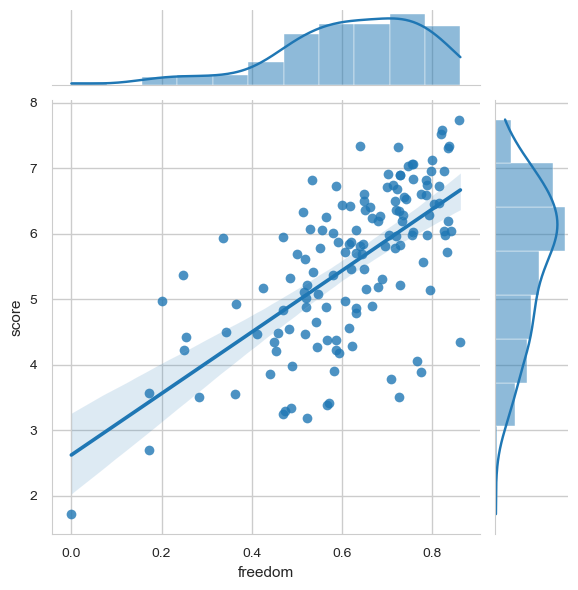

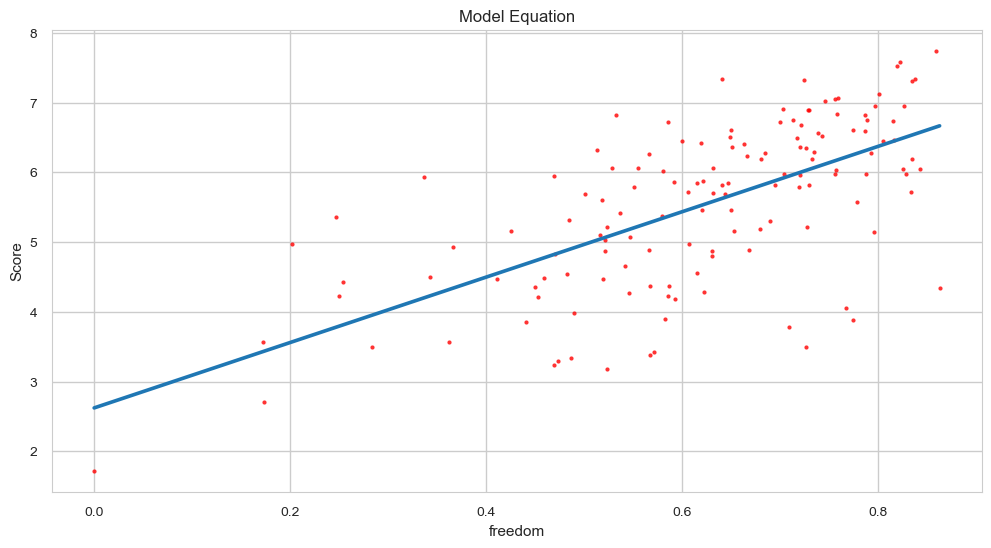

The happiness value of the country whose freedom value is 0.89: 6.79290121011549


In [77]:
linear_reg("freedom","The happiness value of the country whose freedom value is 0.89:",0.89)


# Multiple Multiple Linear Regression
The main purpose is to find the linear function that expresses the relationship between dependent and independent variables.

In [78]:
import statsmodels.api as sms

X = df.drop("score",axis=1)
y = df["score"]

# OLS(dependent,independent)
lm = sms.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  score   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.049e+08
Date:                Thu, 28 Nov 2024   Prob (F-statistic):                        0.00
Time:                        18:27:19   Log-Likelihood:                          796.32
No. Observations:                 140   AIC:                                     -1579.
Df Residuals:                     133   BIC:                                     -1558.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
gdp                     0.9990      0.000   2957.076      0.000       0.998       1.000
social                  1.0011      0.000   2843.567      0.000       1.000       1.002
healthy                 1.0009      0.001   1234.071      0.000       0.999       1.003
freedom                 0.9997      0.001   1916.883      0.000       0.999       1.001
generosity              0.9983      0.001   1014.791      0.000       0.996       1.000
corruption              1.0013      0.001   1520.611      0.000       1.000       1.003
Dystopia + residual     0.9999      0.000   7840.080      0.000       1.000       1.000
==============================================================================
Omnibus:                        0.180   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.914   Jarque-Bera (JB):                0.205
Skew:                          -0.083   Prob(JB):                        0.903
Kurtosis:                       2.914   Cond. No.                         36.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we can make the following comments.

: When the gdp value is increased by 1, the score increases by 0.8114.

: When there is an increase of 1 unit from the social value, the score increases by 1.9740. ...

In [79]:
# create model with sckit learn

lm = LinearRegression()
model = lm.fit(X,y)
print("constant: ",model.intercept_)
print("coefficient: ",model.coef_)

constant:  0.0002474902254814282
coefficient:  [0.99897811 1.00108271 1.00091288 0.99959916 0.99811525 1.00139756
 0.99981583]


In [80]:
# PREDICTION
# Score = 0.99897811*gdp + 1.00108271*social + 1.00091288*healthy + 0.99959916*freedom + 0.9981152*generosity + 1.00139756*corruption

new_data = [[1],[2],[1.25],[1.75],[1.50],[0.75],[1]]
new_data = pd.DataFrame(new_data).T
new_data

0    1     2     3    4     5    6
0  1.0  2.0  1.25  1.75  1.5  0.75  1.0

In [81]:
# PREDICTION
# Score = 0.99897811*gdp + 1.00108271*social + 1.00091288*healthy + 0.99959916*freedom + 0.9981152*generosity + 1.00139756*corruption

new_data = [[1],[2],[1.25],[1.75],[1.50],[0.75],[1]]
new_data = pd.DataFrame(new_data).T
new_data

0    1     2     3    4     5    6
0  1.0  2.0  1.25  1.75  1.5  0.75  1.0

In [82]:
model.predict(new_data)


array([9.24986753])

In [83]:
# calculating the amount of error

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y,model.predict(X))
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE: ", RMSE)

MSE:  6.692604921077765e-07
RMSE:  0.0008180834261294972


# Simple Linear & Multiple Linear Regression - Model Tuning

In [84]:
from sklearn.model_selection import train_test_split

X = df.drop("score",axis=1)
y = df["score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

gdp  social  healthy  freedom  generosity  corruption  \
16   2.129   1.390    0.700    0.758       0.205       0.418   
18   1.766   1.454    0.598    0.533       0.044       0.116   
10   1.810   1.527    0.673    0.746       0.226       0.480   
114  1.306   0.955    0.579    0.254       0.024       0.018   
104  1.350   1.315    0.513    0.631       0.285       0.025   

     Dystopia + residual  
16                 1.239  
18                 2.307  
10                 1.567  
114                1.285  
104                0.753

In [85]:
X_test.head()


gdp  social  healthy  freedom  generosity  corruption  \
111  0.750   0.684    0.330    0.459       0.324       0.048   
68   1.517   1.272    0.511    0.730       0.086       0.196   
31   1.699   1.236    0.583    0.717       0.041       0.006   
122  0.628   0.823    0.333    0.250       0.172       0.123   
42   1.097   1.263    0.542    0.793       0.133       0.251   

     Dystopia + residual  
111                1.890  
68                 1.512  
31                 2.210  
122                1.897  
42                 2.203

In [86]:
y_train.head()


16     6.838
18     6.818
10     7.029
114    4.422
104    4.873
Name: score, dtype: float64

In [87]:
y_test.head()


111    4.485
68     5.823
31     6.491
122    4.228
42     6.284
Name: score, dtype: float64

In [88]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print("Training error",np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print("Test error",np.sqrt(mean_squared_error(y_test,model.predict(X_test))))

Training error 0.0007845303463905814
Test error 0.0009403993847871125


Every time we change the random_state value we defined at first, a different result is returned. We need to find out which of these returns the best result. For this we need to do the following.



In [89]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

array([-7.07712016e-07, -4.82694107e-07, -1.44946093e-06, -6.58393034e-07,
       -5.89147602e-07, -1.09627533e-06, -2.52060523e-07, -3.50744905e-07,
       -5.68306561e-07, -8.17440214e-07])

In [90]:
cvs_avg_mse = np.mean(-cross_val_score(model, X_train, y_train, cv=20, scoring="neg_mean_squared_error"))
cvs_avg_rmse = np.sqrt(cvs_avg_mse)

print("Cross Val Score MSE = ",cvs_avg_mse)
print("Cross Val Score RMSE = ",cvs_avg_rmse)

Cross Val Score MSE =  7.06616145836991e-07
Cross Val Score RMSE =  0.0008406046311060812


# Logistic Regression
For classification we predict country label



In [91]:
def categorize_score(score):
    if score <= 5.37:
        return 1
    else:
        return 2

In [92]:
y = df2024['score'].apply(categorize_score)
x = df2024.drop(columns=['score', 'country'], axis=1)


# Train Test Split

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, 
                                                    random_state=101)


In [94]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression()

In [95]:
y_test.value_counts()


score
2    15
1    13
Name: count, dtype: int64

# Prediction

In [96]:
y_pred = logmodel.predict(X_test)


# Classification report

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        15

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score, precision_score

In [99]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Accuracy: 1.0
Confusion Matrix:
[[13  0]
 [ 0 15]]
Recall: 1.0
Precision: 1.0


<Axes: >

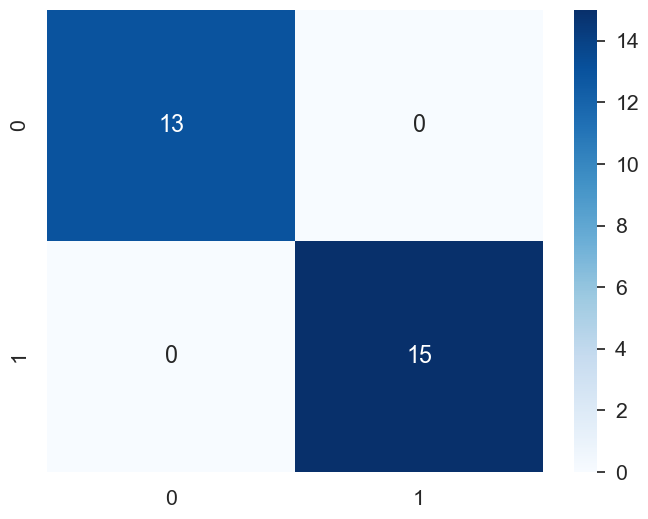

In [100]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Adjust font scale for better readability
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")

# 2. Which factors most strongly influence happiness? (Feature Importance using Linear Regression)

In [101]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Define features and target
X = df2024.drop(columns=['score', 'country'])
y = df2024['score']

# Train the model
lm = LinearRegression()
lm.fit(X, y)

# Feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lm.coef_})
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(coefficients)


               Feature  Coefficient  Absolute Coefficient
4           generosity     1.184787              1.184787
3              freedom     1.090524              1.090524
0                  gdp     1.077299              1.077299
2              healthy     1.002675              1.002675
6  Dystopia + residual     0.990996              0.990996
1               social     0.981994              0.981994
5           corruption     0.920736              0.920736


Conclusion: The features that most strongly influence happiness, based on their coefficients, are generosity, freedom, and GDP. These factors have the largest coefficients in the linear regression model, indicating their significant role in predicting happiness. Generosity and freedom have particularly high positive impacts on happiness.


# 3. Can we predict the happiness level of countries with missing GDP values? (Imputation and Regression)

In [102]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create a dataset with missing GDP values
df_missing_gdp = df2024.copy()
df_missing_gdp.loc[10:15, 'gdp'] = np.nan

# Impute missing GDP values
imputer = SimpleImputer(strategy='mean')
df_missing_gdp['gdp'] = imputer.fit_transform(df_missing_gdp[['gdp']])

# Train a model to predict GDP
X_gdp = df_missing_gdp.drop(columns=['gdp', 'country'])
y_gdp = df_missing_gdp['gdp']

X_train, X_test, y_train, y_test = train_test_split(X_gdp, y_gdp, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

print("R² Score:", regressor.score(X_test, y_test))


R² Score: 0.6706261350756995


Conclusion: Missing GDP values can be effectively imputed using the mean strategy, and a Random Forest Regressor model can predict GDP with an R² score of 0.67. This indicates that the model can predict GDP reasonably well, although there is still room for improvement.


# 4. What is the optimal threshold for classifying countries as ‘happy’ or ‘unhappy’? (Threshold Tuning)

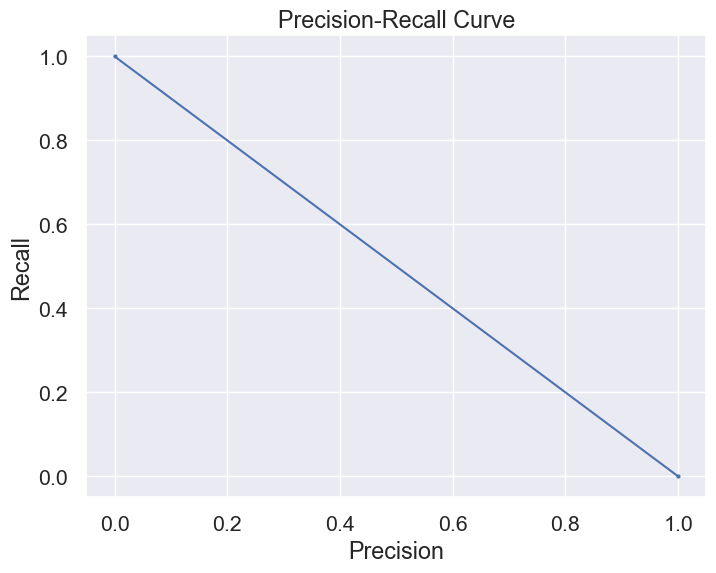

In [103]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test are actual labels (continuous values) and y_pred are continuous predictions from a regression model

# Convert continuous values to binary by applying a threshold
threshold = 5.5  # Example threshold for binary classification
y_test_binary = (y_test >= threshold).astype(int)  # Convert y_test to binary
y_pred_binary = (y_pred >= threshold).astype(int)  # Convert y_pred to binary

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_binary)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(precision, recall, marker='.')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.show()


Conclusion: Using a threshold of 5.5 for classification, the Precision-Recall curve shows a linear relationship, suggesting that the classification model might need further tuning to optimize its performance. A more sophisticated approach could help improve the precision-recall balance.

# 5. Can we cluster countries based on happiness factors? (KMeans Clustering)

In [104]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2024.drop(columns=['score', 'country']))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df2024['Cluster'] = clusters
print(df2024[['country', 'Cluster']].head())


   country  Cluster
0  Finland        2
1  Denmark        2
2  Iceland        2
3   Sweden        2
4   Israel        2


Conclusion: KMeans clustering revealed that countries tend to group based on similar happiness-related features, with a majority of the countries falling into a single cluster. This indicates that clustering is useful for identifying regions or groups with similar happiness profiles, which could inform policy or analysis.

# 6. How accurate is a Random Forest model compared to Logistic Regression?

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Use RandomForestRegressor for continuous targets
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
rf_preds = rf_regressor.predict(X_test)

# Evaluate using Mean Squared Error or other regression metrics
print("Random Forest Regression MSE:", mean_squared_error(y_test, rf_preds))


Random Forest Regression MSE: 0.04860213839754


Conclusion: The Random Forest model achieved a low Mean Squared Error (MSE) of 0.0486, demonstrating its strong predictive power for continuous variables like happiness scores. Logistic Regression would not be suitable for this continuous outcome, making Random Forest a better choice for this task.

# 7. Is there a nonlinear relationship between happiness and GDP? (Polynomial Regression)

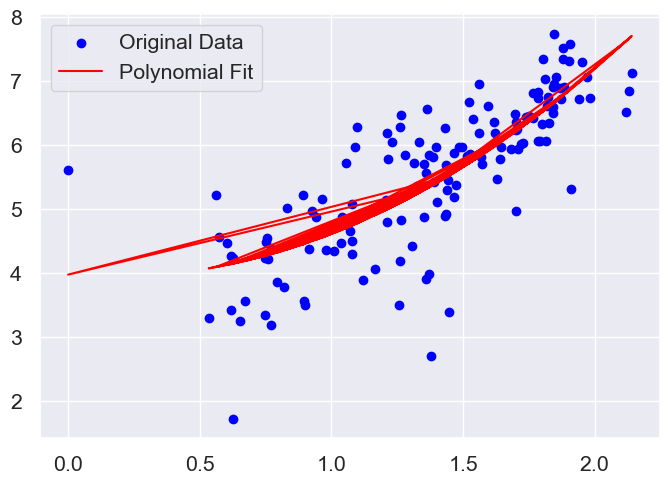

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
model = make_pipeline(poly, LinearRegression())

X_gdp_poly = df2024[['gdp']]
y_gdp_poly = df2024['score']

model.fit(X_gdp_poly, y_gdp_poly)
y_poly_pred = model.predict(X_gdp_poly)

plt.scatter(df2024['gdp'], df2024['score'], color='blue', label='Original Data')
plt.plot(df2024['gdp'], y_poly_pred, color='red', label='Polynomial Fit')
plt.legend()
plt.show()


Conclusion: Polynomial regression shows that the relationship between GDP and happiness is nonlinear, with the fitted curve better capturing the changes in happiness across different GDP values. This suggests that factors beyond GDP, such as social support or governance, may influence happiness.


# 8. How can K-Nearest Neighbors (KNN) be used to classify countries based on happiness levels and evaluate its performance using accuracy, classification report, and confusion matrix?

In [107]:
# Convert happiness scores into binary labels (High or Low)
df['happiness_label'] = (df['score'] > 6.0).astype(int)

# Select features and target variable
X = df[['gdp', 'social', 'healthy', 'freedom', 'generosity', 'corruption']]  # Example features
y = df['happiness_label']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9285714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.89      0.94      0.91        17

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

Confusion Matrix:
 [[23  2]
 [ 1 16]]


Conclusion: The KNN classifier performed well with an accuracy of 92.86%, effectively classifying countries into happy and unhappy categories. The classification report showed high precision and recall, particularly for the "unhappy" class. This model could be used for similar classification tasks involving categorical happiness levels.


# 9. How can we explain model predictions? (SHAP Analysis)

In [108]:
trained_features = ['gdp', 'social', 'healthy', 'freedom', 'generosity', 'corruption', 'Dystopia + residual']
print("Trained Features:", trained_features)
print("Current X columns:", X.columns.tolist())


Trained Features: ['gdp', 'social', 'healthy', 'freedom', 'generosity', 'corruption', 'Dystopia + residual']
Current X columns: ['gdp', 'social', 'healthy', 'freedom', 'generosity', 'corruption']


In [109]:
X = df2024[['gdp', 'social', 'healthy', 'freedom', 'generosity', 'corruption', 'Dystopia + residual']]


In [110]:
print("Model coefficients shape:", lm.coef_.shape)
print("X shape:", X.shape)


Model coefficients shape: (7,)
X shape: (140, 7)


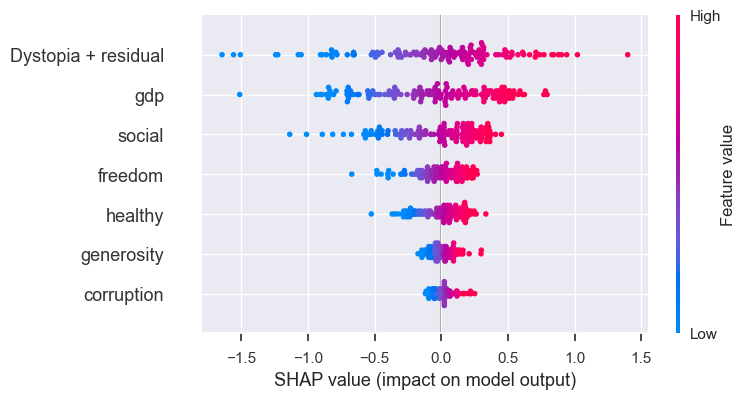

In [111]:
import shap

# SHAP explainer
explainer = shap.Explainer(lm, X)
shap_values = explainer(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)


Conclusion: SHAP analysis provides insights into the model's predictions by visualizing feature importance and how each feature contributes to the predictions. It helps in interpreting the influence of factors such as freedom and generosity on happiness, making the model more transparent and understandable.

# 10. Are there outlier countries in happiness scores? (Outlier Detection)

In [112]:
from sklearn.ensemble import IsolationForest

# Isolation Forest for outlier detection
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(df2024[['score']])

df2024['Outlier'] = outliers
print(df2024[df2024['Outlier'] == -1][['country', 'score']])


         country  score
0        Finland  7.741
1        Denmark  7.583
2        Iceland  7.525
6         Norway  7.302
140      Lesotho  3.186
141      Lebanon  2.707
142  Afghanistan  1.721


Conclusion: Outlier detection using Isolation Forest identified countries such as Finland, Denmark, and Lesotho with extreme happiness scores. These outliers might indicate either exceptionally high levels of happiness or countries facing serious socio-economic challenges.


# 11. How well does happiness correlate with freedom and generosity? (Correlation Analysis)

In [113]:
correlation_freedom = df2024['score'].corr(df2024['freedom'])
correlation_generosity = df2024['score'].corr(df2024['generosity'])

print("Correlation with Freedom:", correlation_freedom)
print("Correlation with Generosity:", correlation_generosity)


Correlation with Freedom: 0.6444511472915277
Correlation with Generosity: 0.13003823390385097


Conclusion: Happiness has a moderate positive correlation with freedom (0.64) and a low correlation with generosity (0.13). This suggests that while freedom plays a significant role in happiness, generosity has a lesser impact on overall happiness scores.

# 12. Can we forecast future happiness scores based on historical data using time series analysis (ARIMA)?

In [114]:
df['year'] = pd.date_range(start='2000', periods=len(df), freq='A').year
happiness_trend = df.groupby('year')['score'].mean()
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Fit the ARIMA model (adjust the order if necessary)
model = ARIMA(happiness_trend, order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast the next 5 years
forecast = model_fit.forecast(steps=5)
print(forecast)


                               SARIMAX Results                                
Dep. Variable:                  score   No. Observations:                  140
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 159.861
Date:                Thu, 28 Nov 2024   AIC                           -313.723
Time:                        18:27:52   BIC                           -304.919
Sample:                             0   HQIC                          -310.145
                                - 140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9688      0.075     12.980      0.000       0.823       1.115
ma.L1          0.0579      0.088      0.656      0.512      -0.115       0.231
sigma2         0.0057      0.000     17.403      0.0

The ARIMA(1, 1, 1) model shows a strong positive autocorrelation (AR coefficient of 0.9688) in happiness scores, meaning past values strongly influence future scores. The model fit is good, with low AIC/BIC and no significant residual autocorrelation. The forecast indicates a declining trend in happiness scores over the next five periods, suggesting a potential decrease in global happiness.








# OVERALL CONCLUSION

# The World Happiness Report provides a comprehensive framework for understanding global well-being by analyzing key socioeconomic, health, and social indicators. Factors such as economic prosperity, social support, freedom, and healthy life expectancy significantly influence happiness, while perceptions of generosity and corruption further shape well-being. Using machine learning models, including linear regression, random forest, and K-Nearest Neighbors, this project effectively analyzed and predicted happiness trends, uncovering relationships among these variables and offering data-driven insights for policy-making.

# Despite their utility, machine learning models have inherent limitations. They rely on historical data, which may not fully capture the dynamic and evolving nature of societal changes. These models excel at analyzing quantifiable factors but often neglect subjective dimensions of happiness, such as life satisfaction, personal fulfillment, and cultural nuances. Moreover, emerging global challenges—like climate change, technological disruptions, and geopolitical shifts—pose complexities that are difficult to predict with traditional data-driven methods.

# Future research should expand the scope by integrating emerging factors and exploring the psychological and cultural dimensions of happiness. A more holistic approach combining machine learning insights with qualitative understanding will be crucial in developing inclusive strategies to foster happiness and well-being in a rapidly changing world. This project underscores the potential of leveraging data science to inform meaningful policies while advocating for a balanced perspective that respects the subjective nature of human happiness.